## GROUP ID :- 06

## PROJECT :- Stock Market Analysis

## EDA( EXPLORATORY DATA ANALYSIS )

## Importing required libraries

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('AAPL.csv')   # read the dataset using read_csv function from pandas 

In [27]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


## DATA PREPROCESSING

In [195]:
# Ensure 'Date' column exists and convert to datetime
df.columns = df.columns.str.strip()  # Remove extra spaces
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Handle invalid dates
    df.dropna(subset=['Date'], inplace=True)  # Drop rows with missing dates
    df.set_index('Date', inplace=True)
else:
    raise ValueError("❌ CSV must contain a 'Date' column.")

# Define target column
target = 'Close'  # Update if needed

# Create Lag Features
df['Lag_1'] = df[target].shift(1)
df['Lag_7'] = df[target].shift(7)

# Drop NaN values caused by shifting
df.dropna(inplace=True)

# Debugging step to verify lag features
print(df.head())  

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-12  60.325714  60.414288  59.821430  60.198570  52.019955  53146800   
2012-01-13  59.957142  60.064285  59.808571  59.972858  51.824898  56505400   
2012-01-17  60.599998  60.855713  60.422855  60.671429  52.428562  60724300   
2012-01-18  60.994286  61.352856  60.900002  61.301430  52.972977  69197800   
2012-01-19  61.450001  61.624287  60.930000  61.107143  52.805092  65434600   

                Lag_1      Lag_7  
Date                              
2012-01-12  60.364285  58.747143  
2012-01-13  60.198570  59.062859  
2012-01-17  59.972858  59.718571  
2012-01-18  60.671429  60.342857  
2012-01-19  61.301430  60.247143  


In [193]:
df = pd.read_csv('AAPL.csv')
print("📂 CSV Columns:", df.columns)


📂 CSV Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [29]:
# Check the shape of the DataFrame
print(f"\nShape of the DataFrame: {df.shape} (Rows, Columns)")


Shape of the DataFrame: (2011, 7) (Rows, Columns)


In [30]:
len(df)

2011

In [31]:
# Display the first and last few rows of the dataset
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
5,2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100
6,2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200
7,2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800
8,2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400
9,2012-01-17,60.599998,60.855713,60.422855,60.671429,52.428562,60724300


In [32]:
print("\nLast 10 rows of the dataset:")
df.tail(10)


Last 10 rows of the dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
2001,2019-12-16,277.000000,280.790009,276.980011,279.859985,277.942474,32046500
2002,2019-12-17,279.570007,281.769989,278.799988,280.410004,278.488770,28539600
2003,2019-12-18,279.799988,281.899994,279.119995,279.739990,277.823334,29007100
2004,2019-12-19,279.500000,281.179993,278.950012,280.019989,278.101410,24592300
2005,2019-12-20,282.230011,282.649994,278.559998,279.440002,277.525391,68994500
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [33]:
# Check the data types of each column
print("\nData types of each column:")
df.dtypes


Data types of each column:


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [34]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [35]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## DESCRIPTIVE STATISTICS

In [37]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
df.describe()


Descriptive statistics of the dataset:


,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [38]:
df.duplicated().sum() # no duplicated values

0

In [39]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


## MISSING VALUES

In [41]:
df.isna().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

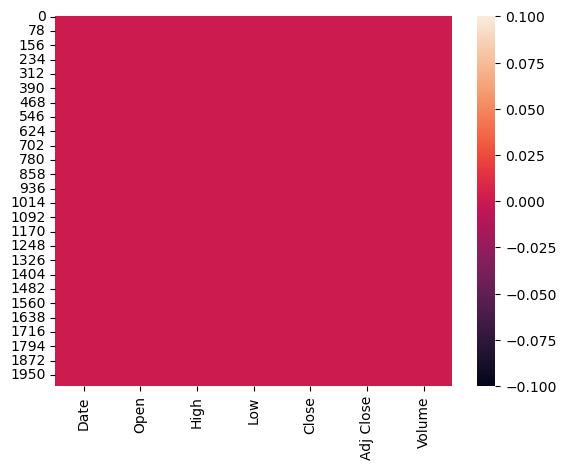

In [42]:
# visualize the missing values:-
sns.heatmap(df.isna())

In [43]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


 # Target variable

In [45]:
df['Close'].value_counts()  # Target variable

Close
99.620003     3
126.599998    3
100.750000    3
97.339996     3
172.500000    3
             ..
90.360001     1
90.279999     1
90.830002     1
90.910004     1
291.519989    1
Name: count, Length: 1912, dtype: int64

## RENAMING THE COLUMNS

In [47]:
# Rename columns for better readability
df.rename(columns={
    'Adj Close': 'Adj_Close',
    
}, inplace=True)

In [48]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


## VISUALIZATION TECHNIQUES

## HISTOGRAM FOR SKEWNESS

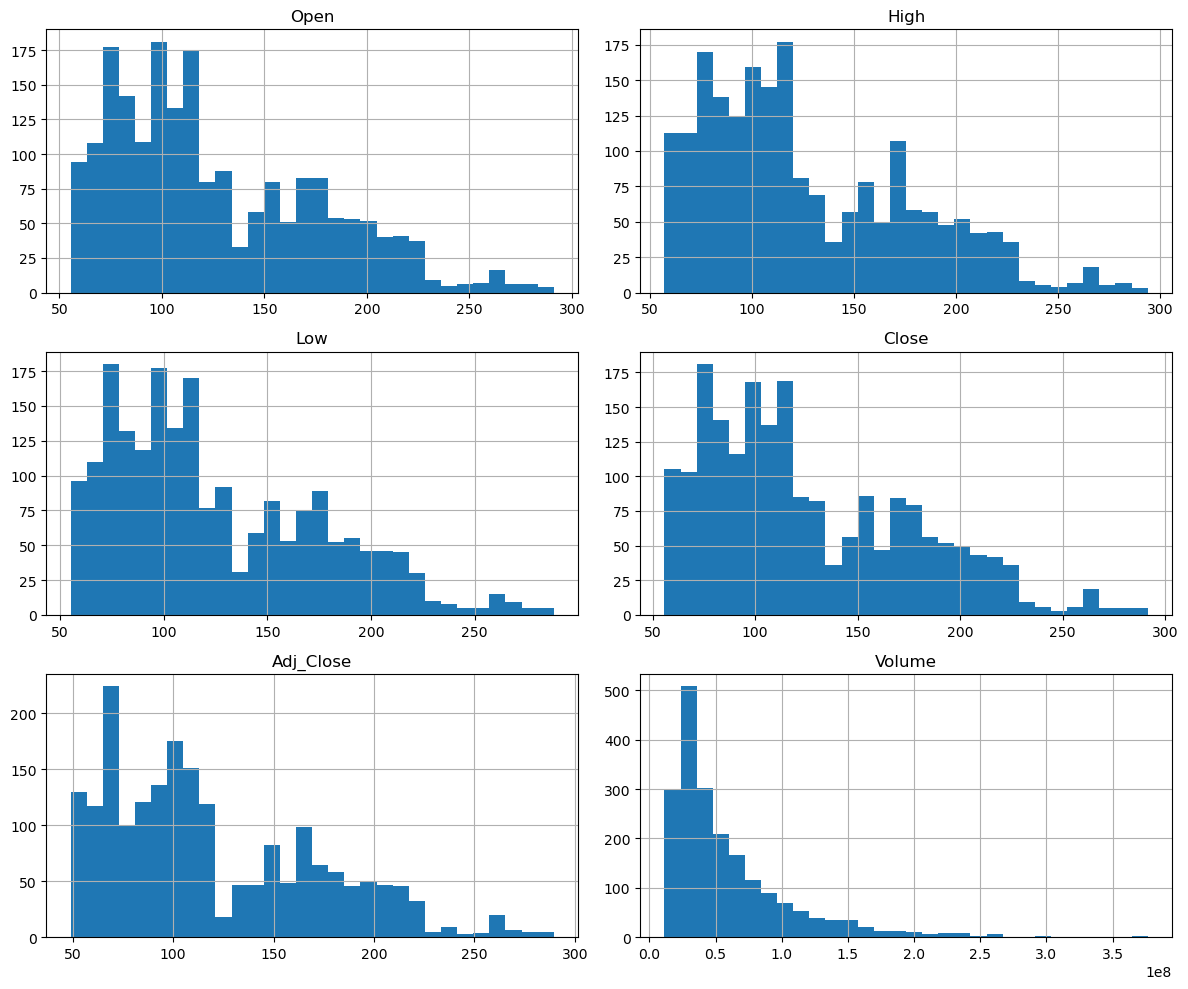

In [51]:
# Visualize distributions using histograms
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

(array([379., 432., 388., 179., 214., 190., 133.,  51.,  29.,  16.]),
 array([ 55.424286 ,  78.9938569, 102.5634278, 126.1329987, 149.7025696,
        173.2721405, 196.8417114, 220.4112823, 243.9808532, 267.5504241,
        291.119995 ]),
 <BarContainer object of 10 artists>)

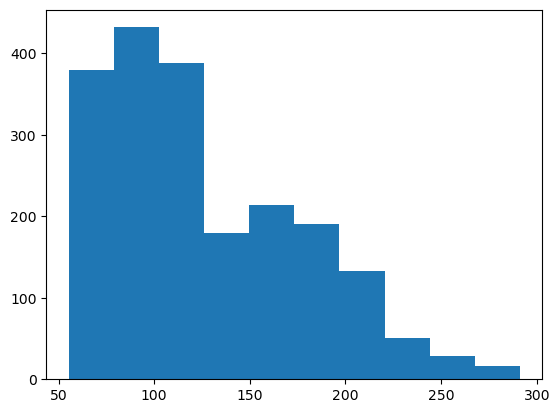

In [52]:
plt.hist(df.Open)

(array([396., 422., 403., 162., 235., 163., 137.,  49.,  29.,  15.]),
 array([ 57.085712 ,  80.7741409, 104.4625698, 128.1509987, 151.8394276,
        175.5278565, 199.2162854, 222.9047143, 246.5931432, 270.2815721,
        293.970001 ]),
 <BarContainer object of 10 artists>)

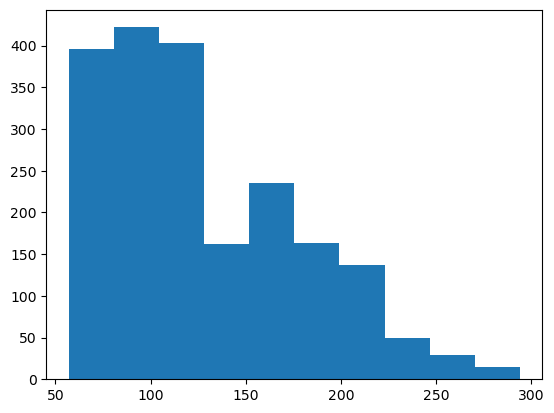

In [53]:
plt.hist(df.High)

(array([386., 427., 381., 182., 210., 196., 137.,  48.,  25.,  19.]),
 array([ 55.014286 ,  78.3248569, 101.6354278, 124.9459987, 148.2565696,
        171.5671405, 194.8777114, 218.1882823, 241.4988532, 264.8094241,
        288.119995 ]),
 <BarContainer object of 10 artists>)

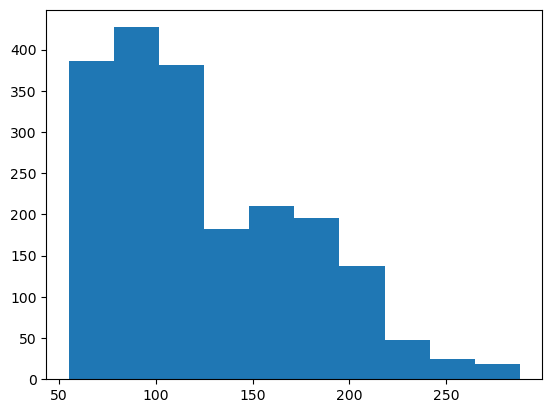

In [54]:
plt.hist(df.Low)

(array([389., 425., 391., 174., 217., 187., 134.,  51.,  28.,  15.]),
 array([ 55.790001 ,  79.3629998, 102.9359986, 126.5089974, 150.0819962,
        173.654995 , 197.2279938, 220.8009926, 244.3739914, 267.9469902,
        291.519989 ]),
 <BarContainer object of 10 artists>)

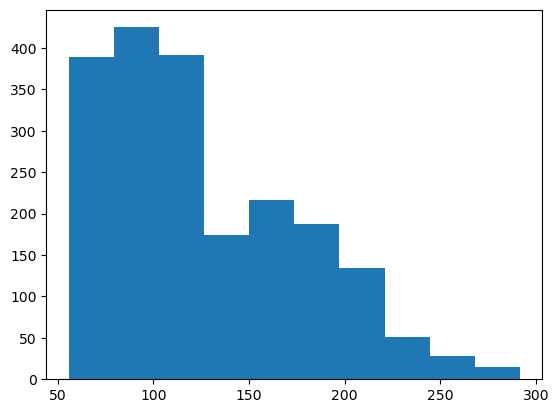

In [55]:
plt.hist(df.Close)

(array([471., 356., 445., 112., 228., 168., 142.,  46.,  27.,  16.]),
 array([ 48.921928 ,  72.9819966,  97.0420652, 121.1021338, 145.1622024,
        169.222271 , 193.2823396, 217.3424082, 241.4024768, 265.4625454,
        289.522614 ]),
 <BarContainer object of 10 artists>)

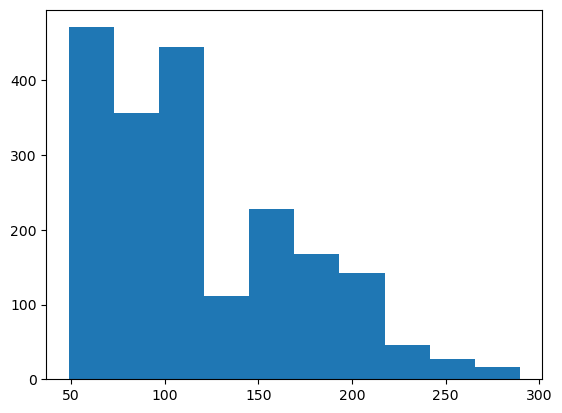

In [56]:
plt.hist(df.Adj_Close)

(array([1.109e+03, 4.920e+02, 2.110e+02, 1.060e+02, 4.500e+01, 2.400e+01,
        1.600e+01, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([1.136200e+07, 4.787880e+07, 8.439560e+07, 1.209124e+08,
        1.574292e+08, 1.939460e+08, 2.304628e+08, 2.669796e+08,
        3.034964e+08, 3.400132e+08, 3.765300e+08]),
 <BarContainer object of 10 artists>)

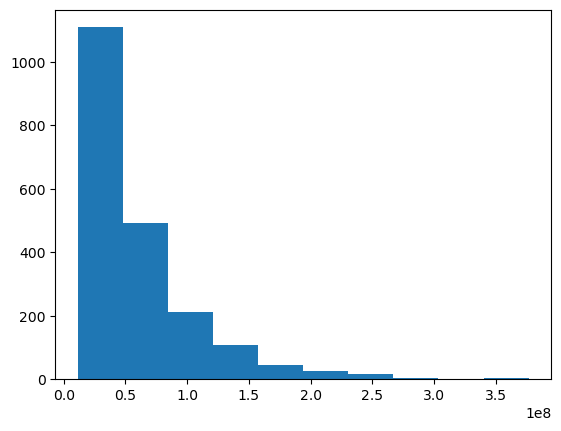

In [57]:
plt.hist(df.Volume)

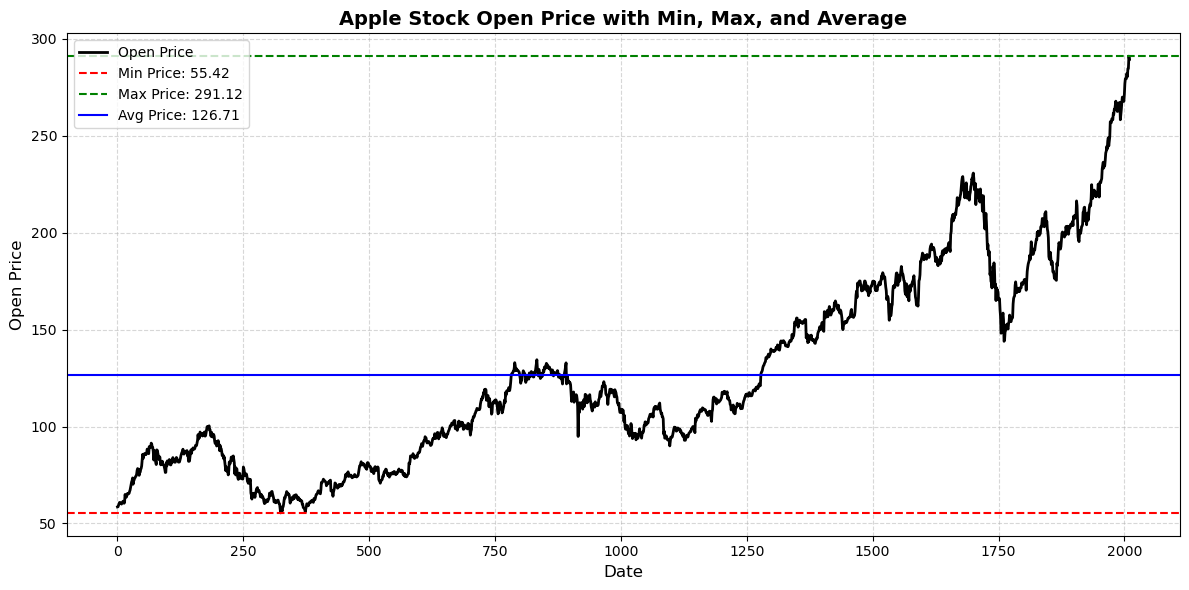

In [58]:
# Line plot to visualize the trends in Apple stock's 'Open' prices over time.

# Calculate Min, Max, and Average for 'Open' price
min_price = df['Open'].min()
max_price = df['Open'].max()
avg_price = df['Open'].mean()
# Plotting the Open price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Open Price', color='black', linewidth=2)
# Adding min, max, and average lines
plt.axhline(min_price, color='red', linestyle='--', label=f'Min Price: {min_price:.2f}')
plt.axhline(max_price, color='green', linestyle='--', label=f'Max Price: {max_price:.2f}')
plt.axhline(avg_price, color='blue', linestyle='-', label=f'Avg Price: {avg_price:.2f}')

# Adding title and labels
plt.title('Apple Stock Open Price with Min, Max, and Average', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()


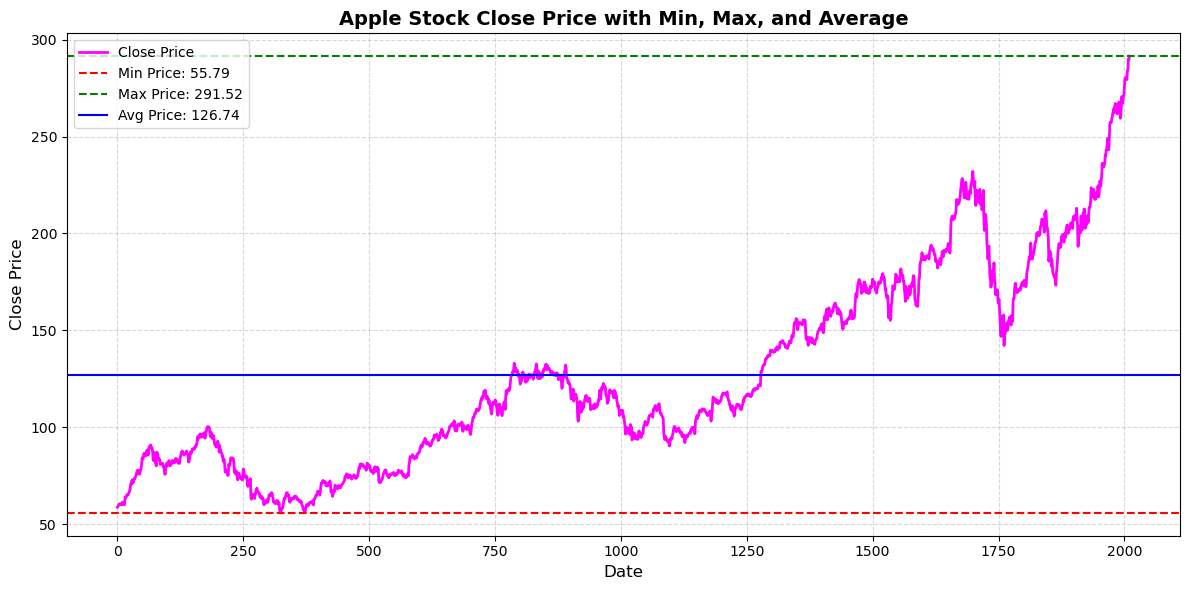

In [59]:
# Line plot to visualize the trends in Apple stock's 'Close' prices over time

# Calculate Min, Max, and Average for 'Close' price
min_price = df['Close'].min()
max_price = df['Close'].max()
avg_price = df['Close'].mean()

# Plotting the Close price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='magenta', linewidth=2)

# Adding min, max, and average lines
plt.axhline(min_price, color='red', linestyle='--', label=f'Min Price: {min_price:.2f}')
plt.axhline(max_price, color='green', linestyle='--', label=f'Max Price: {max_price:.2f}')
plt.axhline(avg_price, color='blue', linestyle='-', label=f'Avg Price: {avg_price:.2f}')

# Adding title and labels
plt.title('Apple Stock Close Price with Min, Max, and Average', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)

# Adding grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


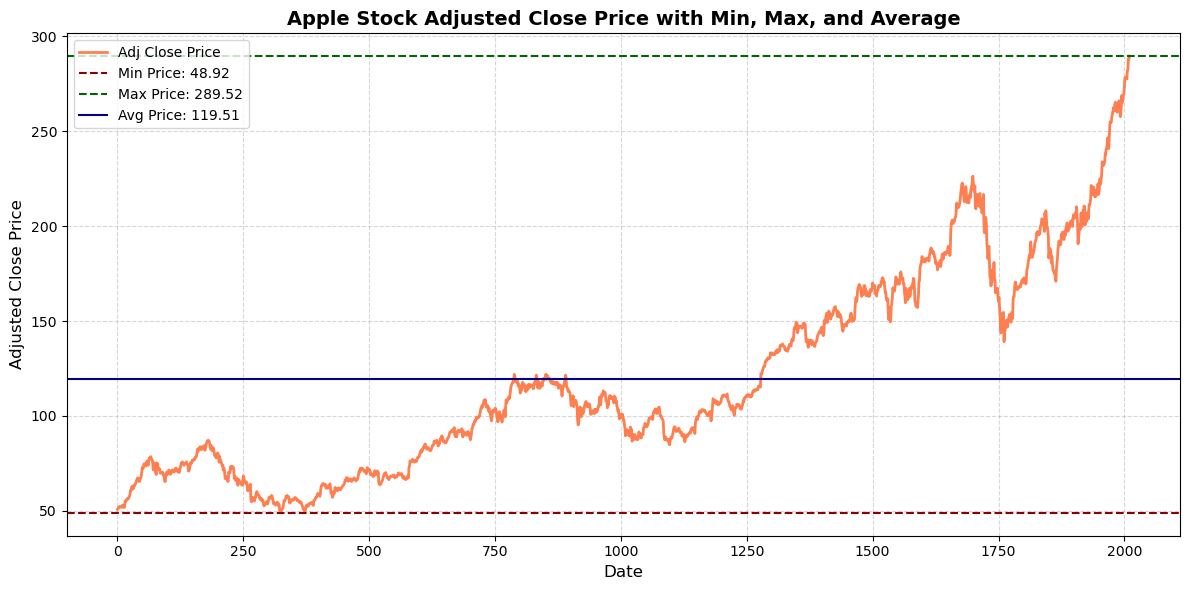

In [60]:
# Line plot to visualize the trends in Apple stock's 'Adj Close' prices over time.

# Calculate Min, Max, and Average for 'Adj Close' price
min_price = df['Adj_Close'].min()
max_price = df['Adj_Close'].max()
avg_price = df['Adj_Close'].mean()
# Plotting the Adjusted Close price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj_Close'], label='Adj Close Price', color='coral', linewidth=2)
# Adding min, max, and average lines
plt.axhline(min_price, color='darkred', linestyle='--', label=f'Min Price: {min_price:.2f}')
plt.axhline(max_price, color='darkgreen', linestyle='--', label=f'Max Price: {max_price:.2f}')
plt.axhline(avg_price, color='darkblue', linestyle='-', label=f'Avg Price: {avg_price:.2f}')


plt.title('Apple Stock Adjusted Close Price with Min, Max, and Average', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()

In [61]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### OUTLIER DETECTION USING BOXPLOT

##### Boxplot plots for 1 feature at a time

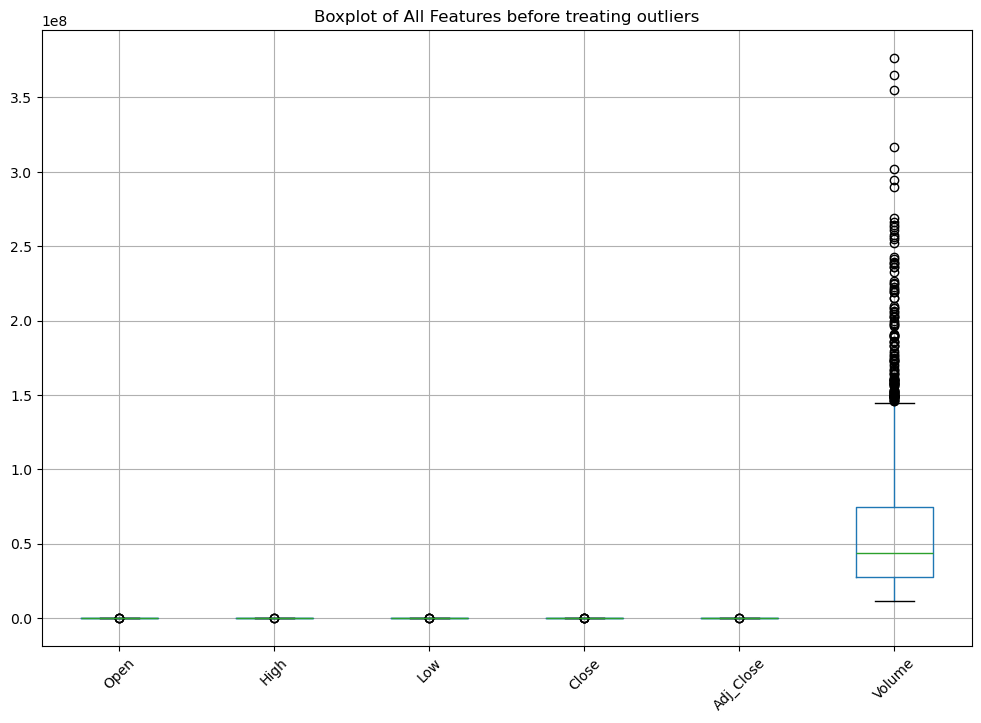

In [64]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of All Features before treating outliers")
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Open'>

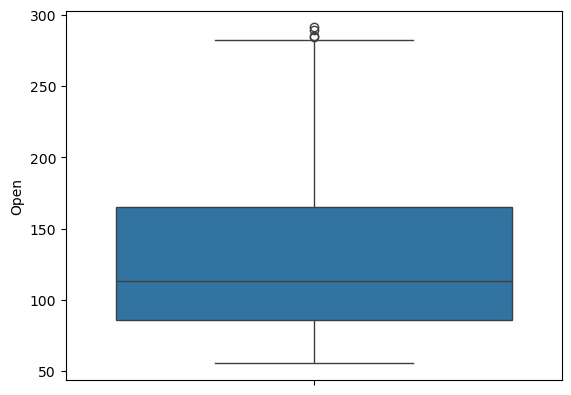

In [65]:
sns.boxplot(df.Open)

<Axes: ylabel='High'>

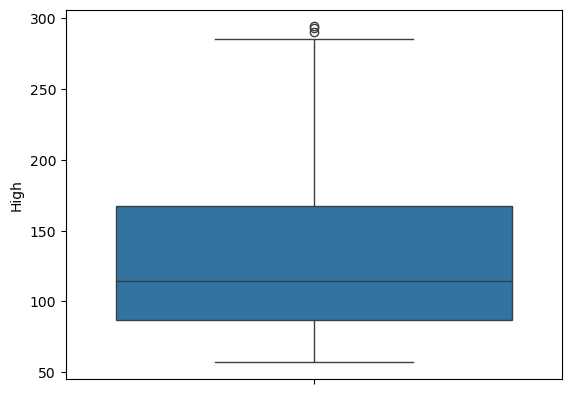

In [66]:
sns.boxplot(df.High)

<Axes: ylabel='Low'>

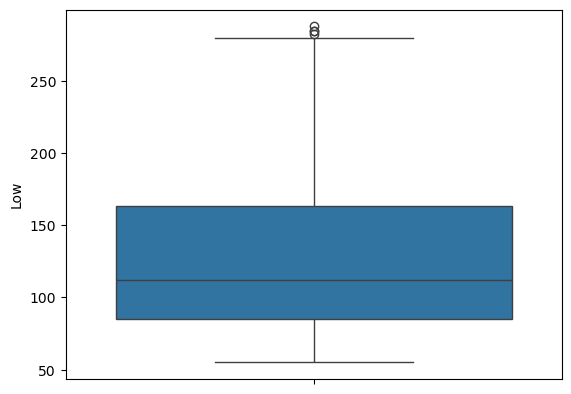

In [67]:
sns.boxplot(df.Low)

<Axes: ylabel='Close'>

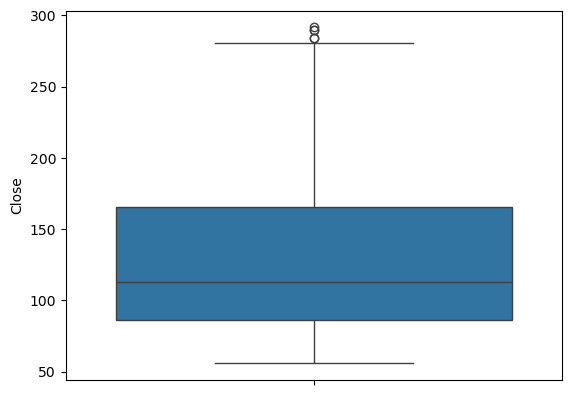

In [68]:
sns.boxplot(df.Close)

<Axes: ylabel='Adj_Close'>

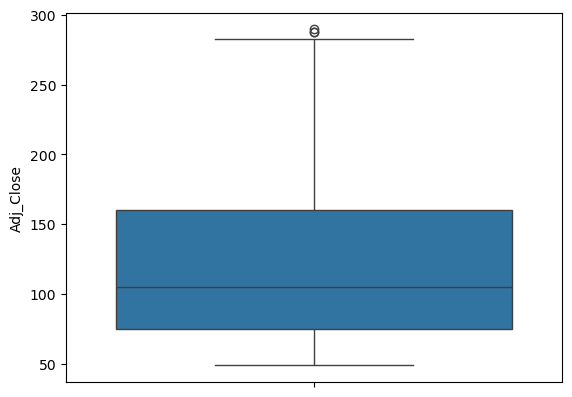

In [69]:
sns.boxplot(df.Adj_Close)

<Axes: ylabel='Volume'>

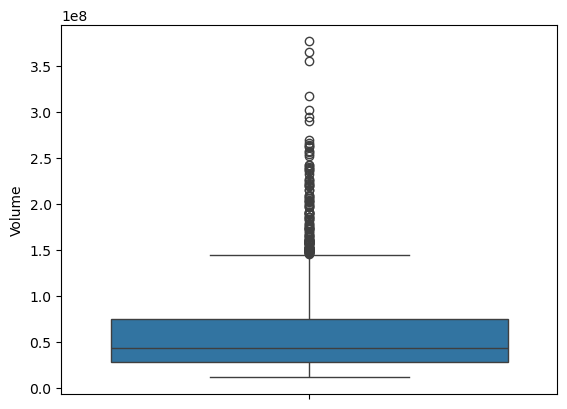

In [70]:
sns.boxplot(df.Volume)

In [71]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### OUTLIER'S TREATMENT

In [73]:
# now to treat the outliers we have :- 
# capping :- Replacing outlier values 
# in capping all outlier values will be replaced by upper extreme or lower extreme values 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)   # lower quartile
    q3 = data[colname].quantile(0.75)   # upper quartile
    iqr = q3-q1   # calculating inter quartile range 

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)

#### otliers present in all the columns

In [75]:
outlier_detection(df,'Open') 

lower_extreme:- -33.07785749999999 , upper_extreme:- 284.1507185 , q1:- 85.8828585 , q3:- 165.1900025


In [76]:
df[df['Open']>284.15]

,Date,Open,High,Low,Close,Adj_Close,Volume
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [77]:
df[df['Open']<-33.07]

,Date,Open,High,Low,Close,Adj_Close,Volume


In [78]:
df.loc[df['Open']>284.15 ,'Open'] = 284.15

In [79]:
df[df['Open']==284.15] 

,Date,Open,High,Low,Close,Adj_Close,Volume
2007,2019-12-24,284.15,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.15,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,284.15,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,284.15,292.690002,285.220001,291.519989,289.522614,36028600


In [80]:
outlier_detection(df,'High')

lower_extreme:- -34.32035024999995 , upper_extreme:- 288.44820374999995 , q1:- 86.71785750000001 , q3:- 167.40999599999998


In [81]:
df.loc[df['High']>288.44,'High'] = 288.44 
df.loc[df['High']<-34.32,'high'] = -34.32

In [82]:
outlier_detection(df,'Low')

lower_extreme:- -32.49642575 , upper_extreme:- 280.97784824999997 , q1:- 85.056427 , q3:- 163.4249955


In [83]:
df.loc[df['Low']>280.97,'Low'] = 280.97 
df.loc[df['Low']<-32.49,'Low'] = -32.49

In [84]:
outlier_detection(df,'Close')

lower_extreme:- -32.36214249999999 , upper_extreme:- 283.8092895 , q1:- 86.2021445 , q3:- 165.2450025


In [85]:
df.loc[df['Close']>283.80,'Close'] = 283.83 
df.loc[df['Close']<-32.36,'Close'] = -32.36

In [86]:
outlier_detection(df,'Adj_Close')

lower_extreme:- -52.42897099999999 , upper_extreme:- 287.532761 , q1:- 75.0566785 , q3:- 160.0471115


In [87]:
df.loc[df['Adj_Close']>287.53,'Adj_Close'] = 287.53
df.loc[df['Adj_Close']<-52.42,'Adj_Close'] = -52.42

In [88]:
outlier_detection(df,'Volume')

lower_extreme:- -43101325.0 , upper_extreme:- 145397275.0 , q1:- 27585650.0 , q3:- 74710300.0


In [89]:
df.loc[df['Volume']>145397275,'Volume'] = 145397275
df.loc[df['Volume']<-43101325,'Volume'] = -43101325

In [90]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume,high
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN
...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,283.830000,282.054138,24643000,NaN
2007,2019-12-24,284.150000,284.890015,280.970000,283.830000,282.322266,12119700,NaN
2008,2019-12-26,284.150000,288.440000,280.970000,283.830000,287.530000,23280300,NaN
2009,2019-12-27,284.150000,288.440000,280.970000,283.830000,287.530000,36566500,NaN


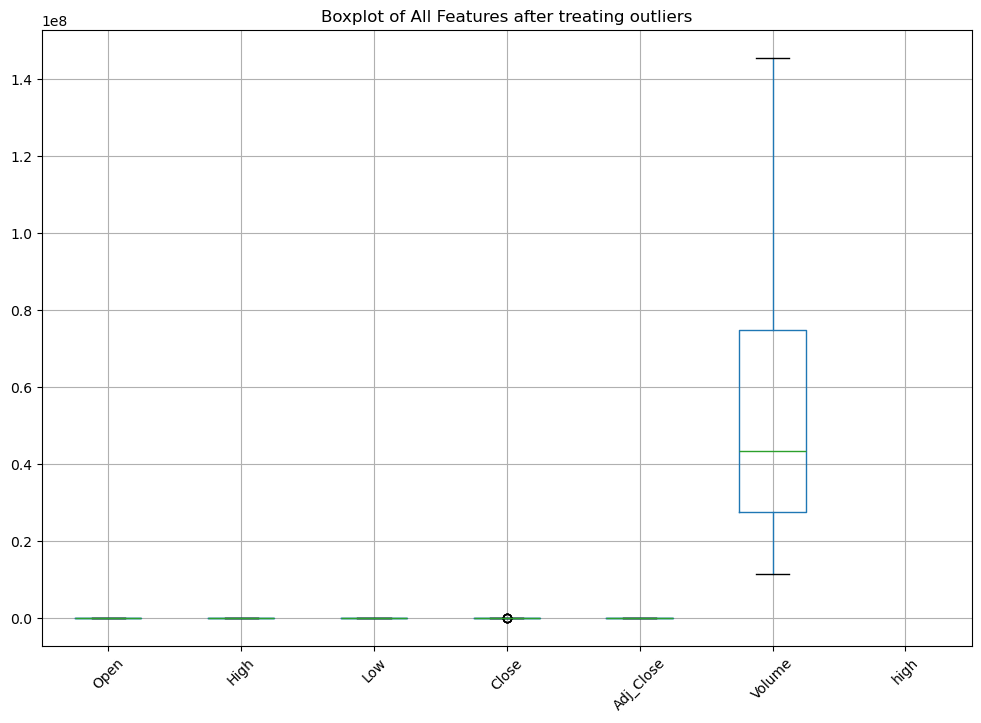

In [91]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of All Features after treating outliers")
plt.xticks(rotation=45)
plt.show()   # all outliers are treated and , now no outliers are present , as can be seen using boxplot

## PAIRPLOT :- A COMBINATION OF HISTOGRAM AND SCATTER PLOT

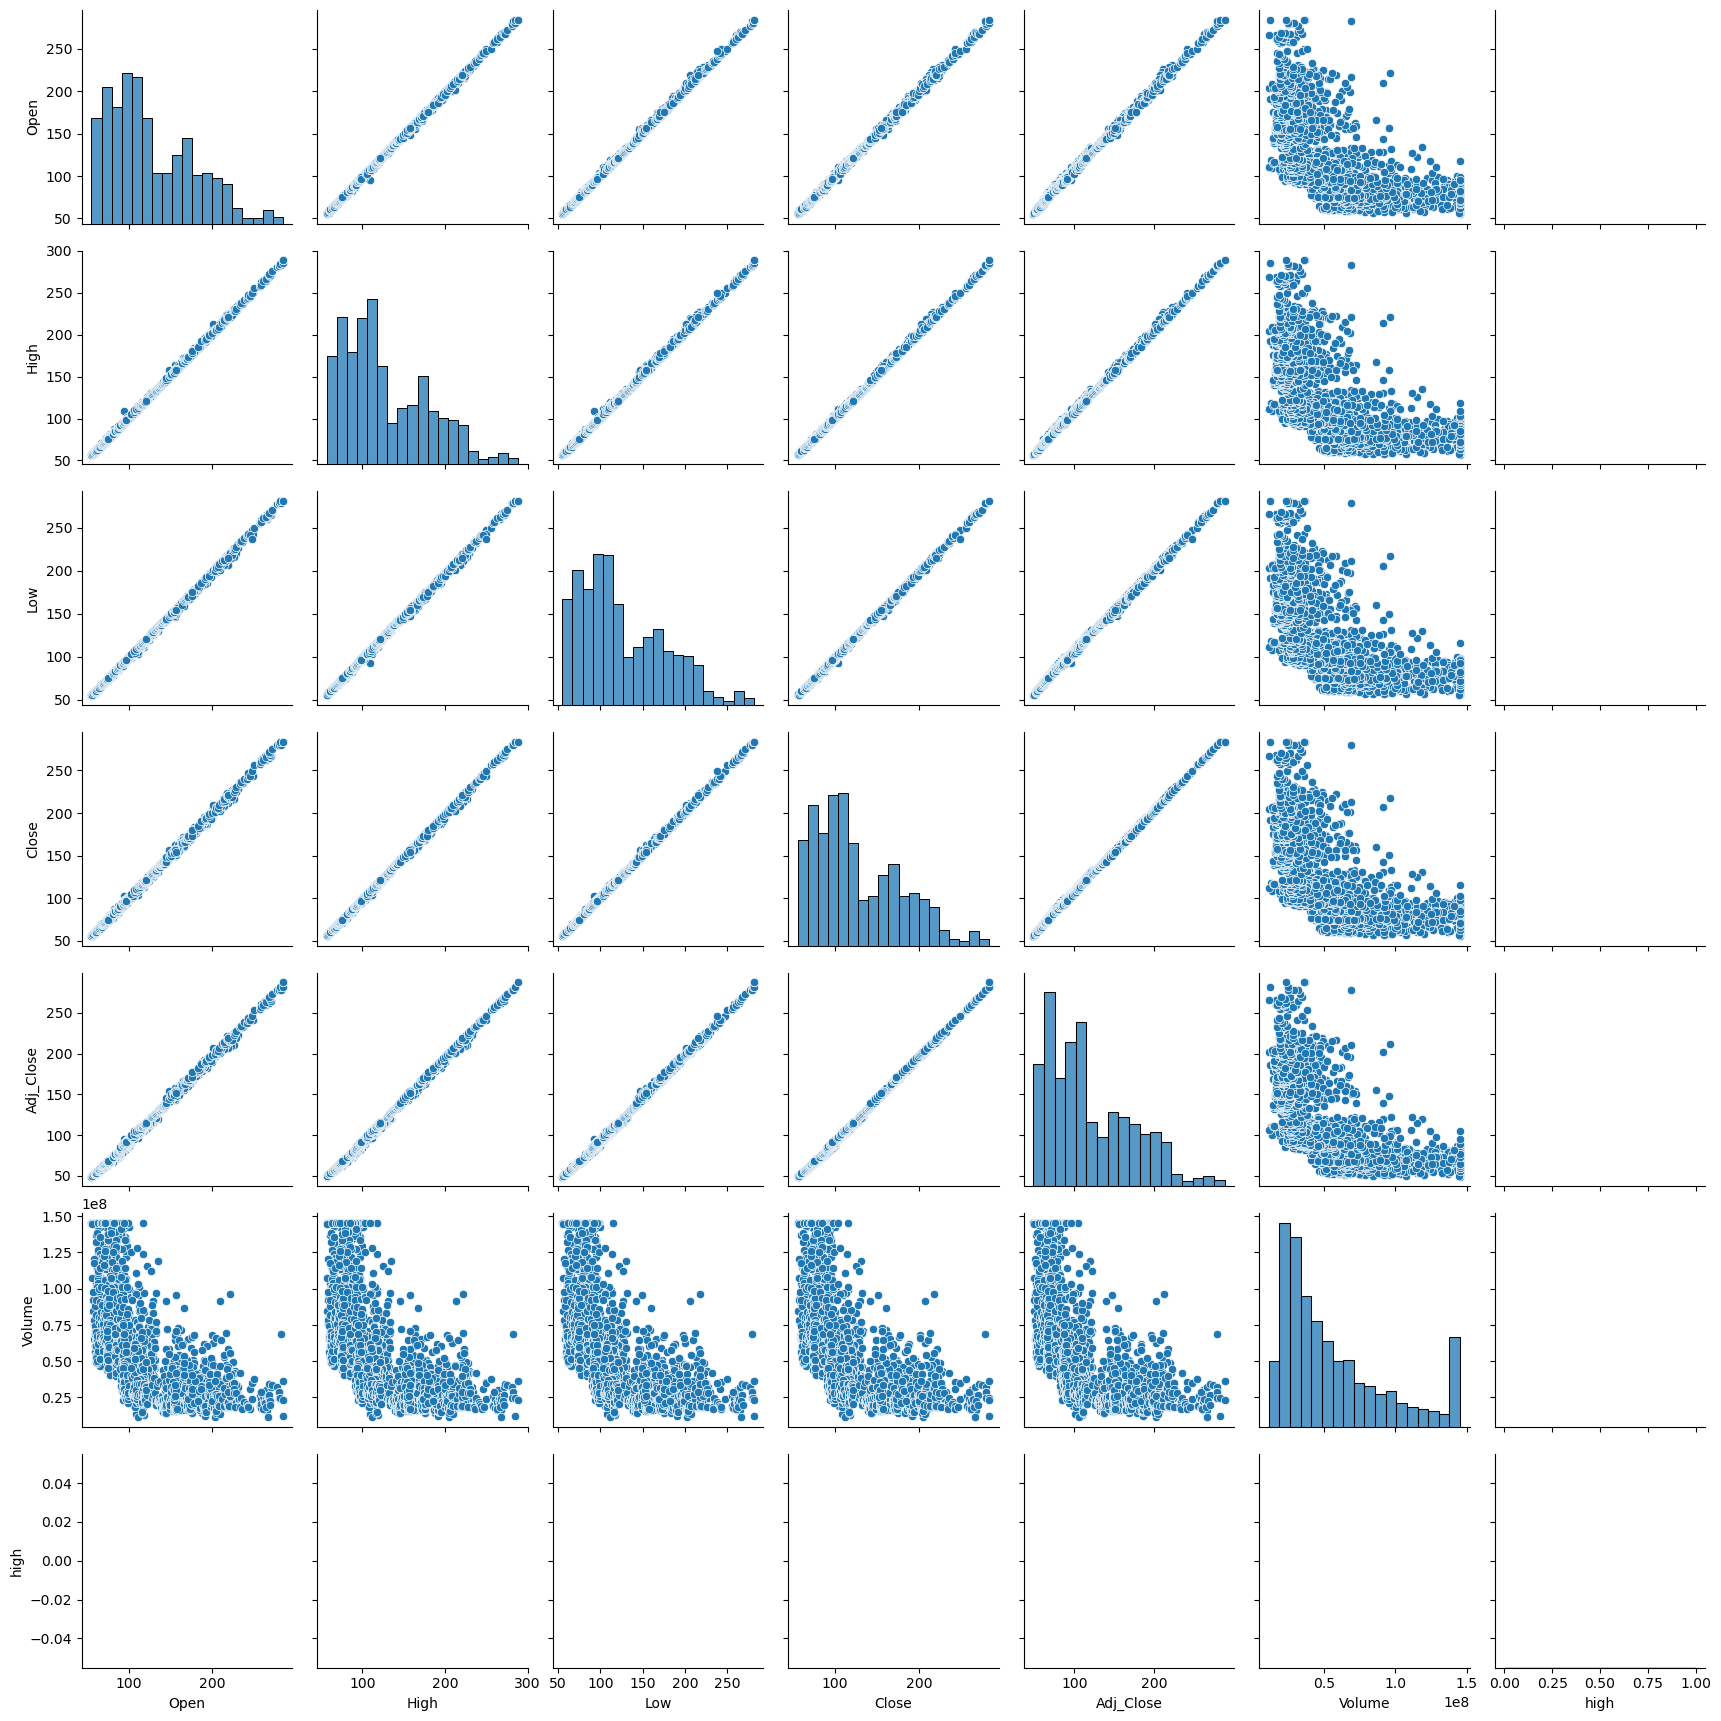

In [93]:
sns.pairplot(df)   # for all features

In [94]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume,high
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN
...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,283.830000,282.054138,24643000,NaN
2007,2019-12-24,284.150000,284.890015,280.970000,283.830000,282.322266,12119700,NaN
2008,2019-12-26,284.150000,288.440000,280.970000,283.830000,287.530000,23280300,NaN
2009,2019-12-27,284.150000,288.440000,280.970000,283.830000,287.530000,36566500,NaN


## DROPPING COLUMNS

In [96]:
data = df.drop(columns=['Date'])

## CORRELATION MATRIX AND HEATMAP

In [98]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume,high
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN
...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,283.830000,282.054138,24643000,NaN
2007,2019-12-24,284.150000,284.890015,280.970000,283.830000,282.322266,12119700,NaN
2008,2019-12-26,284.150000,288.440000,280.970000,283.830000,287.530000,23280300,NaN
2009,2019-12-27,284.150000,288.440000,280.970000,283.830000,287.530000,36566500,NaN


In [99]:
data.corr()

,Open,High,Low,Close,Adj_Close,Volume,high
Open,1.000000,0.999782,0.999719,0.999498,0.998891,-0.623331,NaN
High,0.999782,1.000000,0.999656,0.999747,0.999170,-0.620143,NaN
Low,0.999719,0.999656,1.000000,0.999771,0.999173,-0.628785,NaN
Close,0.999498,0.999747,0.999771,1.000000,0.999395,-0.624961,NaN
Adj_Close,0.998891,0.999170,0.999173,0.999395,1.000000,-0.631739,NaN
Volume,-0.623331,-0.620143,-0.628785,-0.624961,-0.631739,1.000000,NaN
high,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Heatmap plots for all the features at a time

<Axes: >

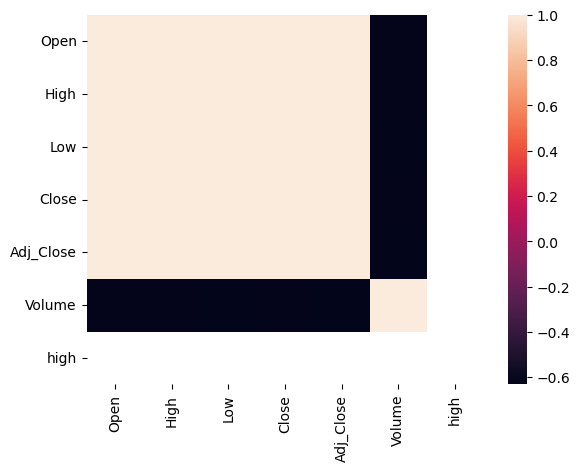

In [101]:
sns.heatmap(df.corr(numeric_only=True))
# See sidebar which shows -1 to +1 valuues from bottom to top
# On the side vertical bar Light color indicates positive strong relationship.
# Dark black color indicates strong negative relationship

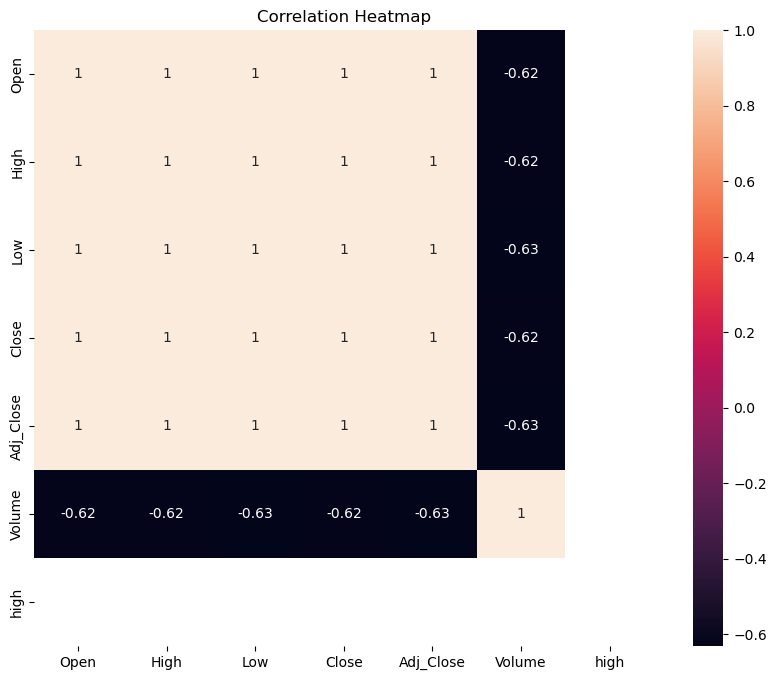

In [102]:
# Check for multicollinearity using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()
# colors are representing correlation value also

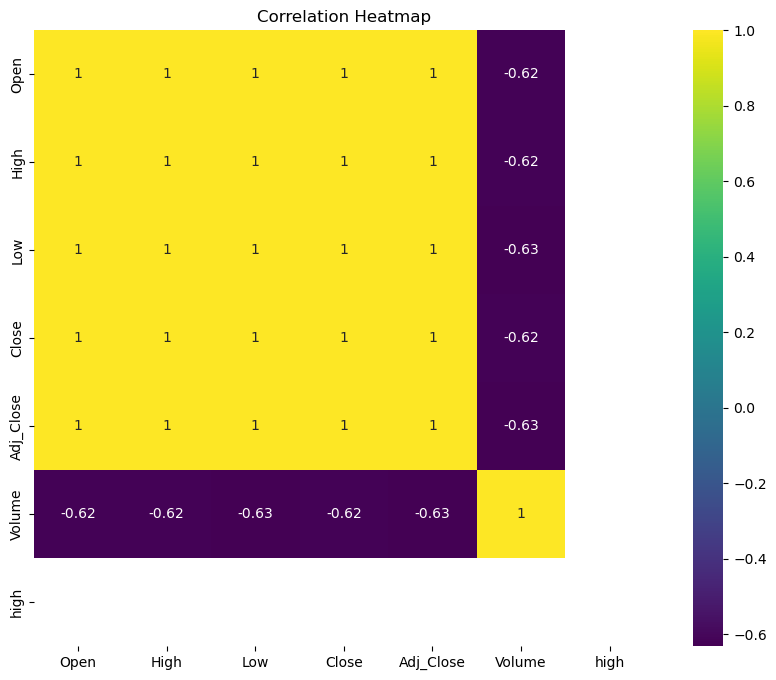

In [103]:
# Check for multicollinearity using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

#### CHECKING FOR MULTICOLLINEARITY PROBLEM ON THE BASIS OF HEATMAP USING SCATTER PLOT

## SCATTER PLOT

In [106]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume,high
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN
...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,283.830000,282.054138,24643000,NaN
2007,2019-12-24,284.150000,284.890015,280.970000,283.830000,282.322266,12119700,NaN
2008,2019-12-26,284.150000,288.440000,280.970000,283.830000,287.530000,23280300,NaN
2009,2019-12-27,284.150000,288.440000,280.970000,283.830000,287.530000,36566500,NaN


Text(0, 0.5, 'Close')

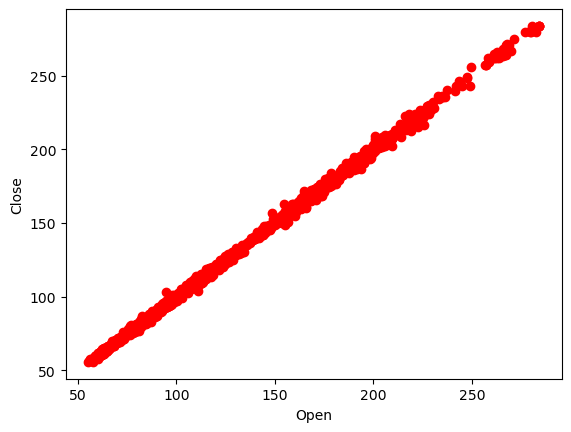

In [107]:
plt.scatter(df['Open'],df['Close'],color='red')  
plt.xlabel('Open')
plt.ylabel('Close')

In [108]:
# a strong positive correlation btwn them

Text(0, 0.5, 'Close')

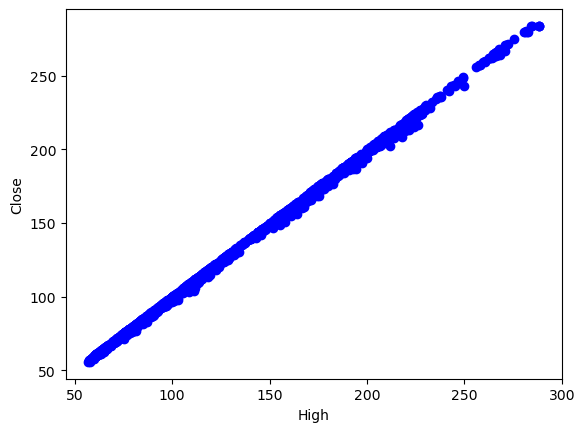

In [109]:
plt.scatter(df['High'],df['Close'],color='blue')   
plt.xlabel('High')
plt.ylabel('Close')

In [110]:
# a strong positive correlation btwn them

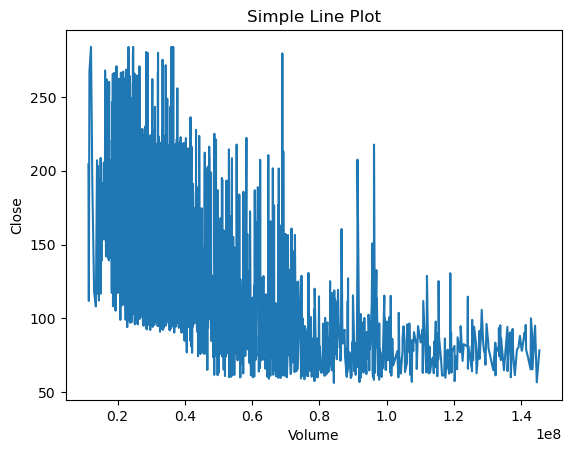

In [111]:
# Create a simple line plot
sns.lineplot(x='Volume', y='Close', data=df)
plt.title('Simple Line Plot')
plt.show()

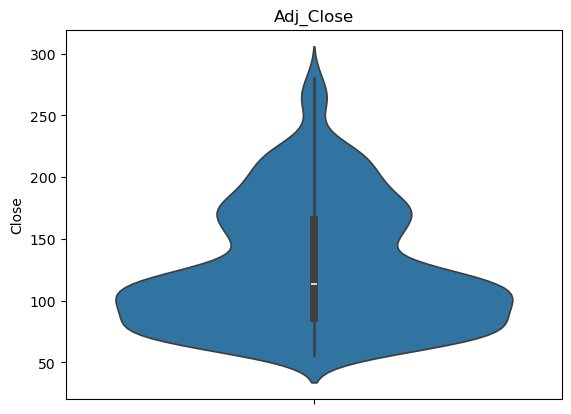

In [112]:
# Create a violin plot to visualize distribution and density
sns.violinplot( y='Close', data=df)
plt.title('Adj_Close')
plt.show()

## Time Series Plot

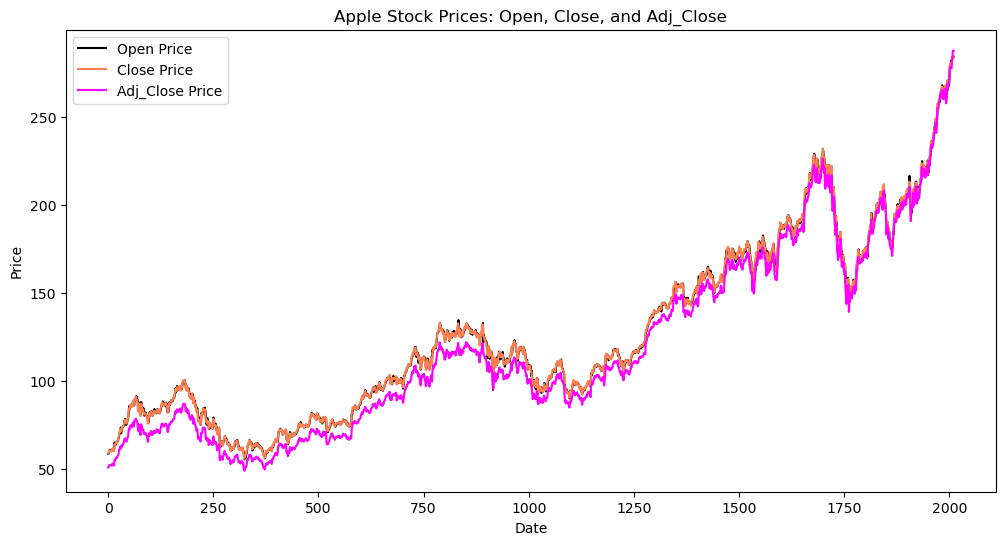

In [114]:
# Line plot to visualize the trends in Apple stock's "Open," "Close," and "Adjusted Close" prices over time.

# Plot the prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Open Price', color='black')
plt.plot(df.index, df['Close'], label='Close Price', color='coral')
plt.plot(df.index, df['Adj_Close'], label='Adj_Close Price', color='magenta')
plt.title('Apple Stock Prices: Open, Close, and Adj_Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

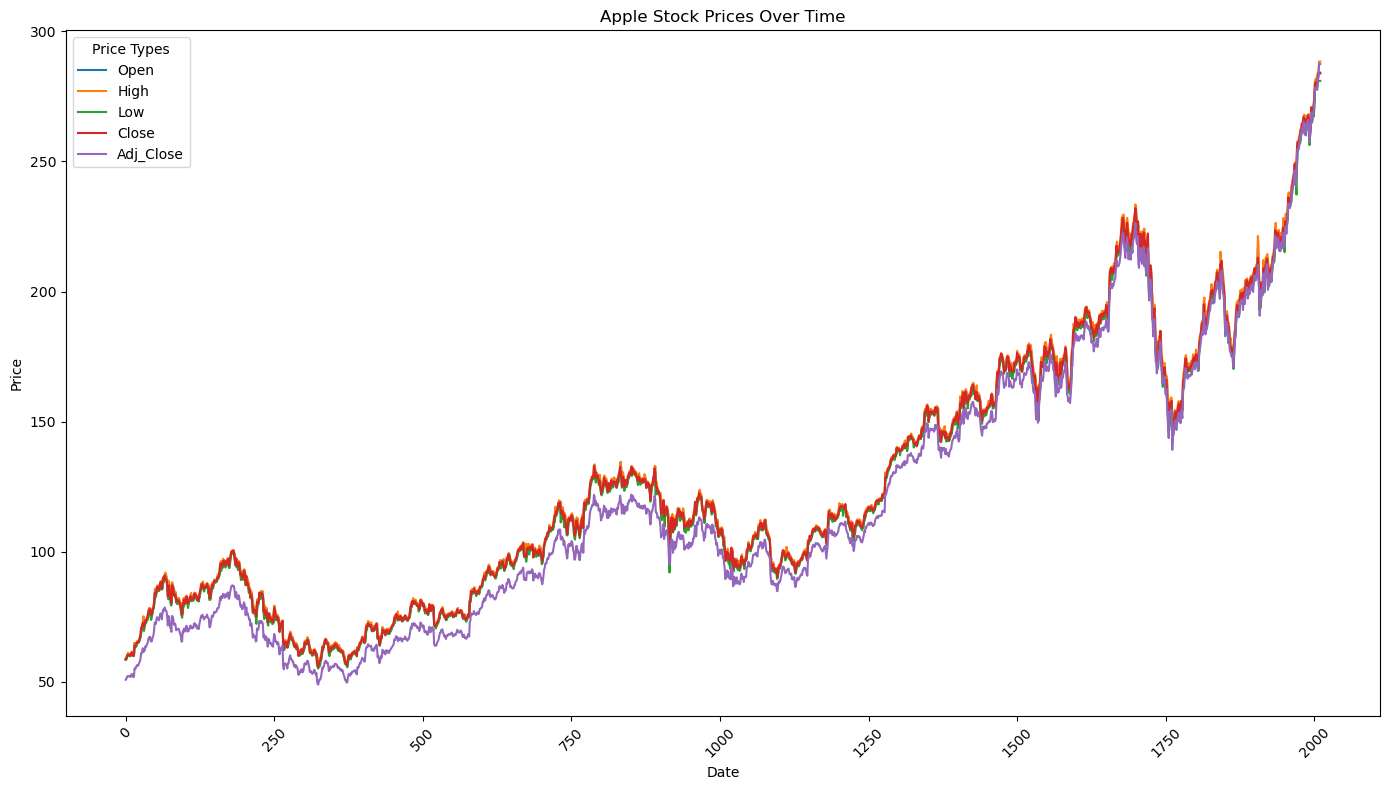

In [115]:
# Generate a line plot to visualize the historical stock prices of Apple over time.
# Allowing for a clear comparison of how these prices have varied over the given date range.

# Plotting 'Open', 'High', 'Low', 'Close', 'Adj Close' prices over time
plt.figure(figsize=(14, 8))
columns = ['Open', 'High', 'Low', 'Close', 'Adj_Close']
# Plot each column as a separate line on the graph
for col in columns:
    sns.lineplot(x=df.index, y=df[col], label=col)

plt.title('Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Types')

# Display the plot
plt.tight_layout()
plt.show()


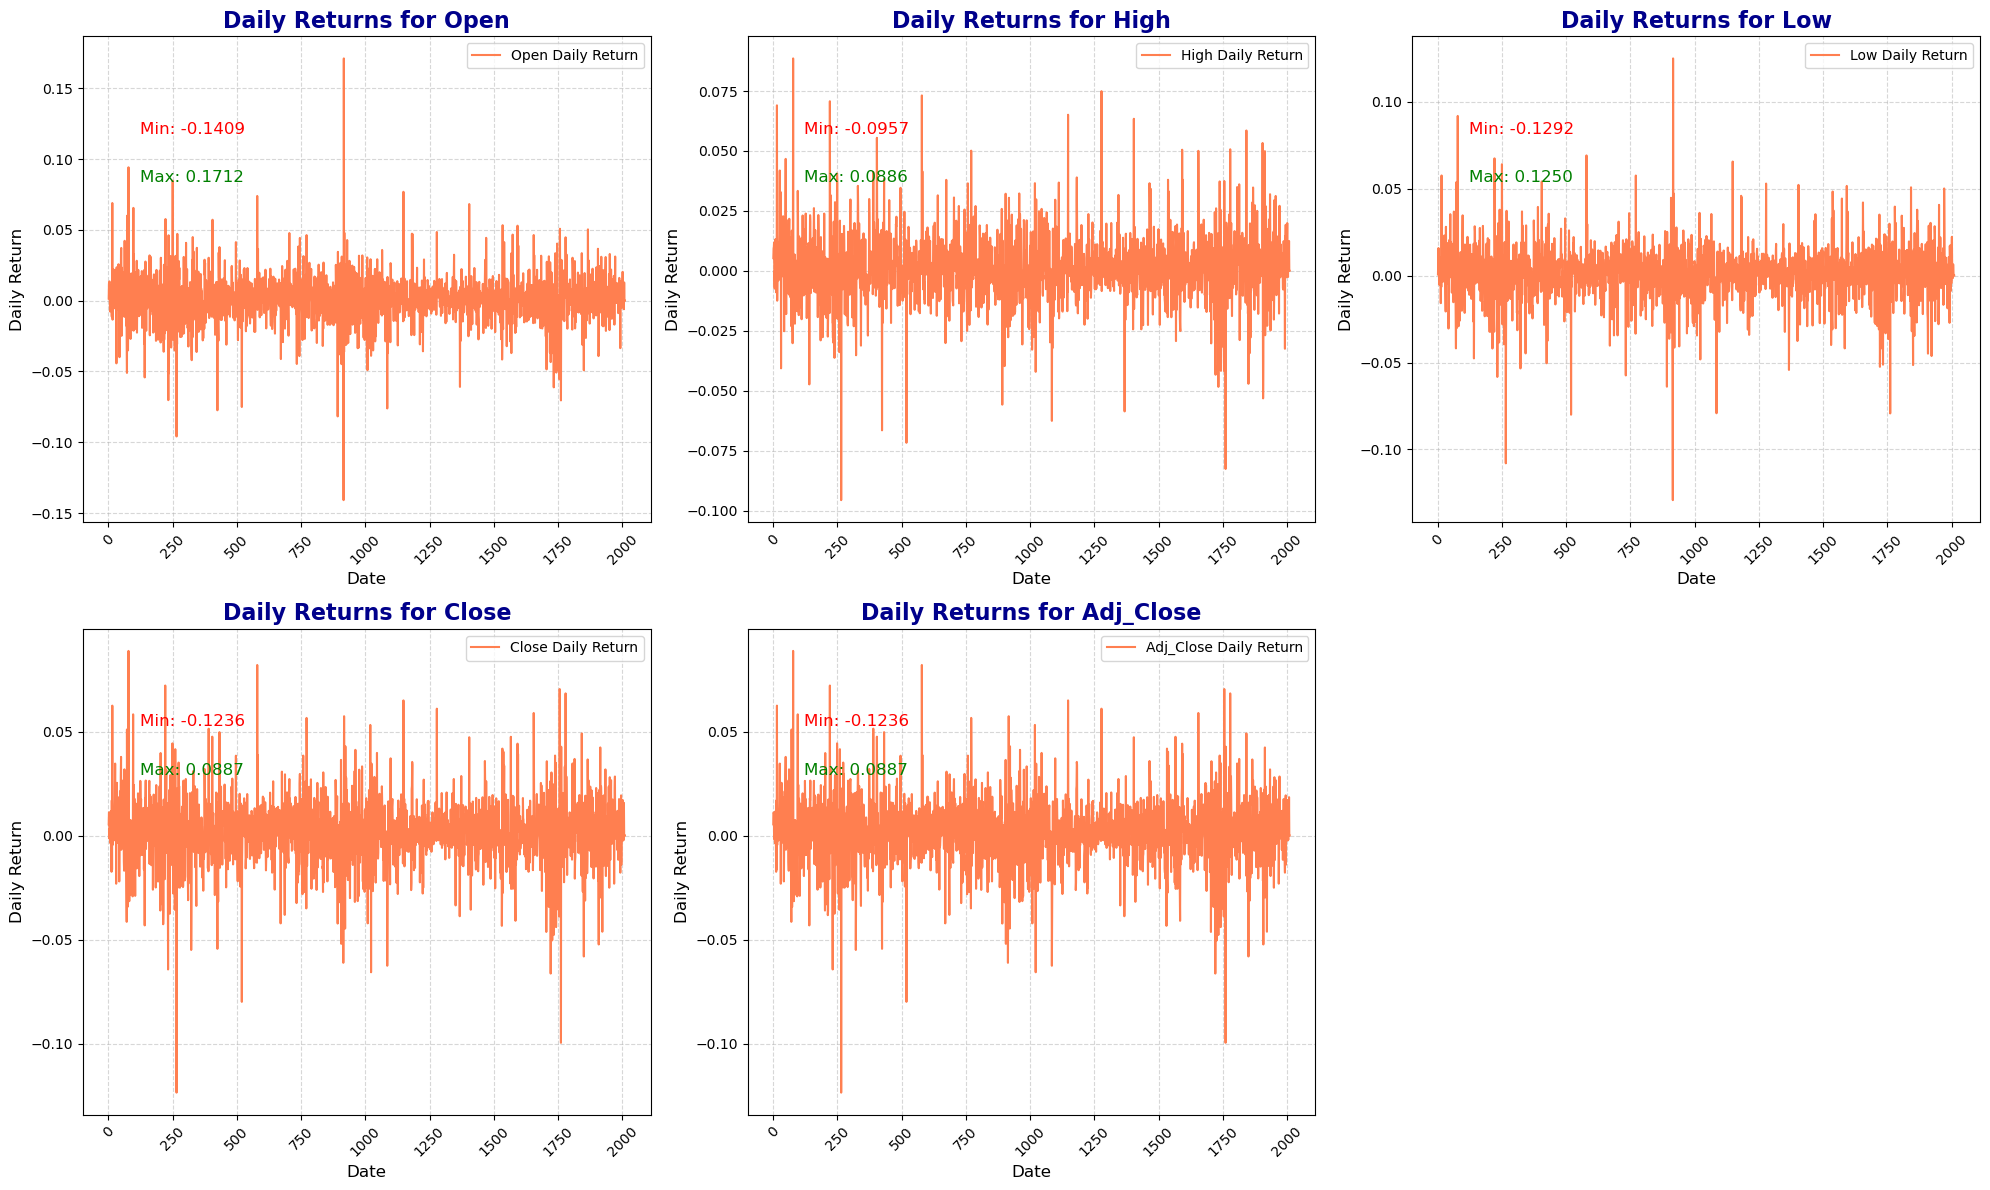

In [116]:
# Shows the daily returns(percentage change) for various Apple stock.
# This analysis helps in understanding the volatility and movement of Apple stock prices over time

# Calculate daily returns for multiple columns
columns = ['Open', 'High', 'Low', 'Close', 'Adj_Close']
for col in columns:
    df[f'{col}_Daily_Return'] = df[col].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

# Function to add min/max annotations
def annotate_min_max(ax, col):
    min_val = df[f'{col}_Daily_Return'].min()
    max_val = df[f'{col}_Daily_Return'].max()
    ax.annotate(f'Min: {min_val:.4f}', xy=(0.1, 0.8), xycoords='axes fraction', color='red', fontsize=12)
    ax.annotate(f'Max: {max_val:.4f}', xy=(0.1, 0.7), xycoords='axes fraction', color='green', fontsize=12)

# Plot daily returns for each column
for i, col in enumerate(columns):
    axes[i].plot(df.index, df[f'{col}_Daily_Return'], label=f'{col} Daily Return', color='coral', linewidth=1.5)
    axes[i].set_title(f'Daily Returns for {col}', fontsize=16, fontweight='bold', color='darkblue')
    axes[i].set_xlabel('Date', fontsize=12)
    axes[i].set_ylabel('Daily Return', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate date labels for better readability
    axes[i].legend()

    # Add min/max annotations for each plot
    annotate_min_max(axes[i], col)
    # Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.5)


fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

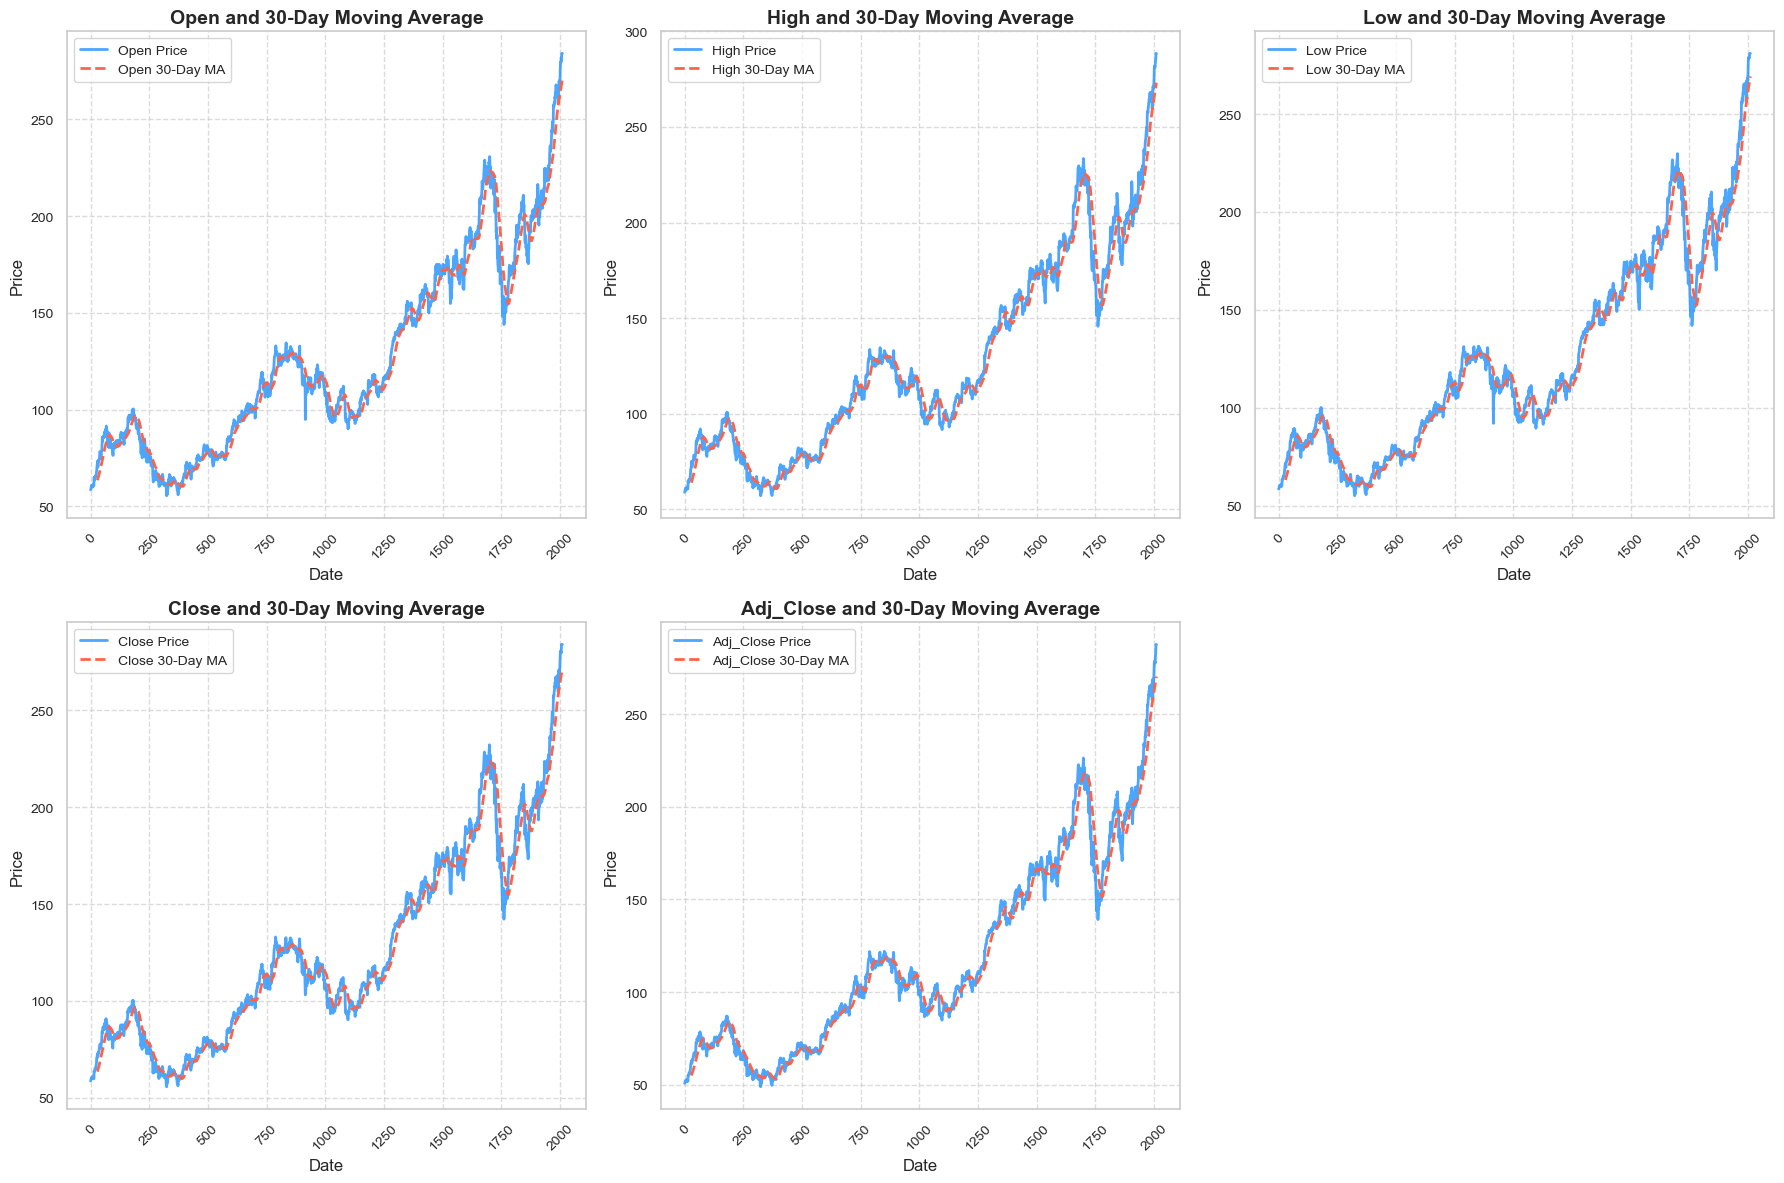

In [117]:
# Plotting the actual stock prices of Apple (Open, High, Low, Close, and Adj Close)
# The moving averages are calculated using a rolling window of 30 days.


sns.set(style="whitegrid")
# Create the subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
columns = ['Open', 'High', 'Low', 'Close', 'Adj_Close']

# Plot the 30-day rolling mean for each column
for i, col in enumerate(columns):
    # Calculate the 30-day moving average
    df[f'{col}_MA30'] = df[col].rolling(window=30).mean()

    # Get the correct axis for each subplot
    ax = axes[i//3, i%3]  # Determine the correct subplot (2x3 grid)

    # Plot the actual prices and moving average (using Date as the index)
    ax.plot(df.index, df[col], label=f'{col} Price', color='dodgerblue', alpha=0.8, linewidth=2)
    ax.plot(df.index, df[f'{col}_MA30'], label=f'{col} 30-Day MA', color='tomato', linestyle='--', linewidth=2)

    # Set title and labels
    ax.set_title(f'{col} and 30-Day Moving Average', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels for readability
    ax.tick_params(axis='y', labelsize=10)
    ax.legend(fontsize=10)
    # Add gridlines for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

fig.delaxes(axes[1, 2])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.tight_layout()
plt.show()

In [118]:
## cheaking for null values

In [119]:
df.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj_Close                    0
Volume                       0
high                      2011
Open_Daily_Return            1
High_Daily_Return            1
Low_Daily_Return             1
Close_Daily_Return           1
Adj_Close_Daily_Return       1
Open_MA30                   29
High_MA30                   29
Low_MA30                    29
Close_MA30                  29
Adj_Close_MA30              29
dtype: int64

In [120]:
df = df.drop(columns=['high'])

In [121]:
df = df.dropna()

## GROUP ID :- 06

## PROJECT :- Stock Market Analysis

# MODEL BUILDING

# 1. LSTM (Long Short-Term Memory )

LSTM is a type of Recurrent Neural Network (RNN) designed to handle sequential data while overcoming the vanishing gradient problem. It is particularly useful for tasks that require long-term dependencies, such as natural language processing, time series forecasting, and speech recognition.

LSTM (Long Short-Term Memory) – A Special Type of RNN
LSTM (Long Short-Term Memory) is an advanced type of Recurrent Neural Network (RNN) designed to handle long-term dependencies in sequential data. It solves the vanishing gradient problem of standard RNNs, allowing it to remember information over long sequences.

The vanishing gradient problem occurs during the training of deep neural networks, especially in RNNs, LSTMs, and deep feedforward networks. It happens when gradients become extremely small during backpropagation, leading to slow or no learning in earlier layers.

If the derivative values are small (<1), multiplying them over many layers shrinks the gradient exponentially → vanishing gradient.
This makes earlier layers learn very slowly, and the network struggles to retain long-term dependencies.

To overcome these issues, LSTMs (Long Short-Term Memory) and GRUs (Gated Recurrent Units) were introduced.

In [129]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

preparing to build an LSTM-based deep learning model using TensorFlow/Keras and MinMaxScaler from scikit-learn for data normalization

Helps LSTM models train faster and perform better.

A linear stack of layers for easy model building.

A fully connected (FC) layer that acts as the output layer.

Dropout Used for regularization to prevent overfitting by randomly deactivating neurons during training.

## 1. Load the CSV File

In [132]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume,Open_Daily_Return,High_Daily_Return,Low_Daily_Return,Close_Daily_Return,Adj_Close_Daily_Return,Open_MA30,High_MA30,Low_MA30,Close_MA30,Adj_Close_MA30
29,2012-02-14,72.094284,72.794289,71.714287,72.779999,62.892056,115099600,0.010270,0.011373,0.009878,0.013649,0.013649,63.413571,63.883857,63.057048,63.574667,54.937368
30,2012-02-15,73.465714,75.184288,70.984283,71.095711,61.436600,145397275,0.019023,0.032832,-0.010179,-0.023142,-0.023142,63.912905,64.425714,63.475572,63.986286,55.293064
31,2012-02-16,70.214287,72.127144,69.518570,71.744286,61.997032,145397275,-0.044258,-0.040662,-0.020648,0.009123,0.009122,64.301000,64.855286,63.843905,64.409000,55.658347
32,2012-02-17,71.872856,72.538574,71.471428,71.731430,61.985954,133951300,0.023622,0.005704,0.028091,-0.000179,-0.000179,64.720809,65.280143,64.261191,64.809428,56.004373
33,2012-02-21,72.411430,73.550003,72.017143,73.550003,63.557446,145397275,0.007493,0.013943,0.007635,0.025353,0.025352,65.135619,65.718714,64.665476,65.249667,56.384801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,283.830000,282.054138,24643000,-0.006023,0.005661,0.006498,0.015710,0.016318,267.965332,269.977666,266.480001,268.695667,266.860296
2007,2019-12-24,284.150000,284.890015,280.970000,283.830000,282.322266,12119700,0.012904,0.002252,0.002140,0.000000,0.000951,268.826999,270.725000,267.236334,269.416667,267.590921
2008,2019-12-26,284.150000,288.440000,280.970000,283.830000,287.530000,23280300,0.000000,0.012461,0.000000,0.000000,0.018446,269.580333,271.580000,267.904667,270.145667,268.503083
2009,2019-12-27,284.150000,288.440000,280.970000,283.830000,287.530000,36566500,0.000000,0.000000,0.000000,0.000000,0.000000,270.347666,272.368667,268.568000,270.791000,269.332151


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1982 entries, 29 to 2010
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1982 non-null   object 
 1   Open                    1982 non-null   float64
 2   High                    1982 non-null   float64
 3   Low                     1982 non-null   float64
 4   Close                   1982 non-null   float64
 5   Adj_Close               1982 non-null   float64
 6   Volume                  1982 non-null   int64  
 7   Open_Daily_Return       1982 non-null   float64
 8   High_Daily_Return       1982 non-null   float64
 9   Low_Daily_Return        1982 non-null   float64
 10  Close_Daily_Return      1982 non-null   float64
 11  Adj_Close_Daily_Return  1982 non-null   float64
 12  Open_MA30               1982 non-null   float64
 13  High_MA30               1982 non-null   float64
 14  Low_MA30                1982 non-null   floa

## 2. Convert Date Column & Set as Index

In [135]:
df["Date"] = pd.to_datetime(df["Date"])
# Converts the "Date" column in the DataFrame to datetime format for proper time-series handling.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1982 entries, 29 to 2010
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1982 non-null   datetime64[ns]
 1   Open                    1982 non-null   float64       
 2   High                    1982 non-null   float64       
 3   Low                     1982 non-null   float64       
 4   Close                   1982 non-null   float64       
 5   Adj_Close               1982 non-null   float64       
 6   Volume                  1982 non-null   int64         
 7   Open_Daily_Return       1982 non-null   float64       
 8   High_Daily_Return       1982 non-null   float64       
 9   Low_Daily_Return        1982 non-null   float64       
 10  Close_Daily_Return      1982 non-null   float64       
 11  Adj_Close_Daily_Return  1982 non-null   float64       
 12  Open_MA30               1982 non-null   float64     

In [137]:
df.set_index("Date", inplace=True)
# Sets the "Date" column as the index, ensuring that data is structured properly for time-series analysis.

In [138]:
df

,Open,High,Low,Close,Adj_Close,Volume,Open_Daily_Return,High_Daily_Return,Low_Daily_Return,Close_Daily_Return,Adj_Close_Daily_Return,Open_MA30,High_MA30,Low_MA30,Close_MA30,Adj_Close_MA30
Date,,,,,,,,,,,,,,,,
2012-02-14,72.094284,72.794289,71.714287,72.779999,62.892056,115099600,0.010270,0.011373,0.009878,0.013649,0.013649,63.413571,63.883857,63.057048,63.574667,54.937368
2012-02-15,73.465714,75.184288,70.984283,71.095711,61.436600,145397275,0.019023,0.032832,-0.010179,-0.023142,-0.023142,63.912905,64.425714,63.475572,63.986286,55.293064
2012-02-16,70.214287,72.127144,69.518570,71.744286,61.997032,145397275,-0.044258,-0.040662,-0.020648,0.009123,0.009122,64.301000,64.855286,63.843905,64.409000,55.658347
2012-02-17,71.872856,72.538574,71.471428,71.731430,61.985954,133951300,0.023622,0.005704,0.028091,-0.000179,-0.000179,64.720809,65.280143,64.261191,64.809428,56.004373
2012-02-21,72.411430,73.550003,72.017143,73.550003,63.557446,145397275,0.007493,0.013943,0.007635,0.025353,0.025352,65.135619,65.718714,64.665476,65.249667,56.384801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,283.830000,282.054138,24643000,-0.006023,0.005661,0.006498,0.015710,0.016318,267.965332,269.977666,266.480001,268.695667,266.860296
2019-12-24,284.150000,284.890015,280.970000,283.830000,282.322266,12119700,0.012904,0.002252,0.002140,0.000000,0.000951,268.826999,270.725000,267.236334,269.416667,267.590921
2019-12-26,284.150000,288.440000,280.970000,283.830000,287.530000,23280300,0.000000,0.012461,0.000000,0.000000,0.018446,269.580333,271.580000,267.904667,270.145667,268.503083


## 3. Normalize the Data (Min-Max Scaling)

In [140]:
# Select Close Price for prediction
# Extracts the closing stock prices as a NumPy array.
# reshape(-1, 1) converts the 1D array into a 2D array, which is required for MinMaxScaler and LSTM processing
# MinMaxScaler and LSTMs require 2D inputs: (samples, features).
data = df["Close"].values.reshape(-1, 1)  # Ensure correct shape


In [141]:
data

array([[ 72.779999],
       [ 71.095711],
       [ 71.744286],
       ...,
       [283.83    ],
       [283.83    ],
       [283.83    ]])

In [142]:
data.shape

(1982, 1)

In [143]:
# Normalize the data
# MinMaxScaler scales the data to a range between 0 and 1, improving LSTM performance.
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [144]:
data_scaled , data_scaled.shape

(array([[0.07450446],
        [0.06711853],
        [0.06996266],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]]),
 (1982, 1))

In [145]:
len(data)

1982

In [146]:
seq_length

NameError: name 'seq_length' is not defined

## 4. Create Sequences for LSTM

In [ ]:
# The function creates sequences of past 50 days (or seq_length) as input (X) and the next day's price as output (y).
# function is created , to divide the input sequence into x and y , for further training and testing process

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# for i in range(1982 - 10)
# for i in range(1972)
# Use past 50 days to predict the next day
# if seq_length = 50, then:
# X[0] = data[0:50] → First 50 days as input
# y[0] = data[50] → 51st day's price as output
# The reason we stop at len(data) - seq_length is to avoid indexing out of bounds when accessing y[i+seq_length].
# The lists are converted to NumPy arrays for efficient computation when training the LSTM model.

In [ ]:
seq_length = 50 


In [ ]:
X.shape

In [ ]:
# Ensure there is enough data for sequence creation
if len(data_scaled) > seq_length:
    X, y = create_sequences(data_scaled, seq_length)
    if X.shape[0] == 0:
        raise ValueError("Not enough sequences created. Check the dataset size and sequence length.")
    X = X.reshape((X.shape[0], X.shape[1], 1))  # Ensure correct shape for LSTM input
else:
    raise ValueError("Not enough data points to create sequences with the given sequence length.")

# Ensures the dataset is large enough for LSTM training.
# data_scaled > seq_length
# 1982 > 50 
# If the number of data points is less than seq_length, an error is raised.
# function create_sequences is called from above written function, it will output the  values of x and y variables.
# The reshape((X.shape[0], X.shape[1], 1)) ensures that the data is formatted correctly for LSTM input:
# LSTMs expect input in 3D: (samples,sequence_length,features)
# samples → Number of sequences (or examples in the dataset).
# sequence_length → Number of time steps in each sequence (e.g., 50 days for stock prediction).
# features → Number of variables at each time step (e.g., Close price).


In [ ]:
X.shape

In [ ]:
X.shape[0]

In [ ]:
X.shape[0] == 0

## 5. Train-Test Split

In [ ]:
len(X)

In [ ]:
len(X) * 0.8

In [ ]:
int(len(X) * 0.8)

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]     
y_train, y_test = y[:train_size], y[train_size:]
dates = df.index[train_size + seq_length:]  # Get corresponding dates for test data

# x_train = X[:1545]  
# x_test = X[1545:]
# y_train = y[:1545] 
# y_test = y[1545:]

# Get corresponding dates for test data
# The test data will start from index 1545 + 50 = 1595 . 
# This means the dates variable will contain the dates starting from the 1595th index, which corresponds to the first test sample.

## 6. Build the LSTM Model

In [ ]:
# Build LSTM model
# Sequential Model: A simple stack of layers.
# LSTM(50, return_sequences=True):
# First LSTM layer with 50 units.
# input_shape:- (50,1) 
# Since you're predicting stock prices, there's typically just one feature 
# return_sequences = This tells the LSTM to return the full sequence of outputs (instead of just the final output). 
# This is crucial when we are stacking multiple LSTM layers, as the next LSTM layer needs the sequence of outputs from the first one.
# Dropout(0.2): Drops 20% of neurons to prevent overfitting
# return_sequences=False means it outputs only the final step's result.
# Dense(25): Fully connected layer with 25 neurons.
#Dense layers in the model are typically used after the LSTM layers to help the model move from temporal dependencies (sequence) to final predictions.
# Dense(1): Output layer that predicts the next day's stock price.

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")
# Adam Optimizer: Adaptive learning rate optimization for better training.
# Mean Squared Error (MSE): Common loss function for regression tasks.
# An optimizer is a key component in deep learning that updates the model’s weights to minimize the loss function during training. 
# The goal is to find the optimal parameters (weights) that make the model perform best.
# It combines the ideas of Momentum and RMSprop, which helps it converge faster and work well with complex models.

## 7. Train the Model

In [ ]:
len(X_train)

In [ ]:
len(X_train) > 0

In [ ]:
len(y_train)

In [ ]:
len(X_test)

In [ ]:
# Train the model
if len(X_train) > 0 and len(y_train) > 0:
    model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# The model will go through the entire dataset 20 times
# Processes 16 sequences at a time before updating weights
# Uses test data to check model performance after each epoch
# Prints training progress

## 8. Make Predictions

In [ ]:
len(X_test)

In [ ]:
# Predictions
if len(X_test) > 0:
    y_pred = model.predict(X_test)
    # Converting Predictions Back to Original Scale
    y_pred = scaler.inverse_transform(y_pred)   # Since LSTM predictions are in a scaled form, we reverse the scaling
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  #  ensures y_test has the correct 2D shape for inverse transformation.

    # Plot results
    plt.figure(figsize=(12,6))
    plt.plot(dates, y_test, label="Actual Price")
    plt.plot(dates, y_pred, label="Predicted Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title("Apple Stock Price Prediction")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Print first few predicted vs actual values with corresponding dates
    for i in range(min(30, len(dates))):
        print(f"Date: {dates[i].date()}, Actual: {y_test[i][0]:.2f}, Predicted: {y_pred[i][0]:.2f}")

# If predictions closely match actual prices, the model is performing well.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 2. ARIMA model

ARIMA is a statistical model used for time series forecasting. It is particularly useful for predicting future values based on past observations. that combines three components:

AutoRegression (AR) → Uses past values to predict future values.

Integration (I) → Makes the data stationary by differencing.

Moving Average (MA) → Models the relationship between past forecast errors.

### 1. Import Required Libraries

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df

### 2. Select Data for Prediction

In [ ]:
# Select the 'Close' price for prediction
data = df["Close"]

In [ ]:
data

### 3. Split Data into Training and Testing Sets

In [ ]:
# Split data into training and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)   # calculates the number of data points for training.
train, test = data[:train_size], data[train_size:]

In [ ]:
train_size

In [ ]:
train

In [ ]:
test

### 4. Build and Train the ARIMA Model

In [ ]:
# Fit the ARIMA model (p=5, d=1, q=0 is just an example, adjust p, d, q for your data)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
# p=5 → the model will use the last 5 observations to predict the next value. (AutoRegressive component).
# d=1 → Differencing is applied once to remove trends and make the series stationary.(Integrated component).
# q=0 → No past forecast errors are used in the model.
# This means that the model does not use past residuals (errors) to improve predictions.(Moving Average component). 
# .fit() trains the model on the train data.

### 5. Make Predictions on Test Data

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = np.array(predictions)
# predicts the next len(test) days based on the training data.

In [ ]:
predictions

### 6. Plot Actual vs Predicted Prices

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual Price")
plt.plot(test.index, predictions, label="Predicted Price")
plt.title("ARIMA Model Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

### 7. Evaluate Model Performance

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


In [ ]:
for i in range(min(30, len(test))):  # Show first 10 predictions
    print(f"Date: {test.index[i].date()}, Actual: {test.iloc[i]:.2f}, Predicted: {predictions[i]:.2f}")


# 3.SARIMA Model 

SARIMA (Seasonal AutoRegressive Integrated Moving Average) model

SARIMA is an extension of the ARIMA (AutoRegressive Integrated Moving Average) model, designed to handle seasonal time series data. It combines non-seasonal ARIMA components with additional seasonal components to capture repeating patterns over fixed intervals (e.g., monthly sales, quarterly earnings).

p	AutoRegressive (AR) order	:-            Uses past p values to predict the next one.


d	Differencing order (I)      :-             	Number of times the data is differenced to remove trends.


q	Moving Average (MA) order	:-Uses past q errors to adjust predictions.

P	Seasonal AutoRegressive (SAR) order	:-Similar to AR, but for seasonal patterns.

D	Seasonal Differencing order:-	Differencing applied to remove seasonality.

Q	Seasonal Moving Average (SMA) order:-	Similar to MA, but for seasonal patterns.

S	Seasonal Period	:-Defines the length of one seasonal cycle (e.g., S=12 for yearly seasonality in monthly data).


### 1.Import Required Libraries

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
# mean_squared_error: Helps evaluate the accuracy of our model

### 2.Load and Prepare Data

In [ ]:
# Select 'Close' price for prediction
data = df["Close"]
# We extract the closing stock prices from the dataset.
# This is the time series we will predict.

In [ ]:
# Split into training (80%) and testing (20%) sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


### 3.Define and Train the SARIMA Model

In [ ]:
# Fit the SARIMA model (p, d, q) x (P, D, Q, S)
# p=5 → Uses 5 past values (AutoRegressive component).AR(5) means that today's value depends on the past 5 values.
# d=1 → Differencing is applied once (Integrated component).Differencing removes trends to make data stationary.
# q=0 → No moving average component (Moving Average component).q=0 means that no past error terms are considered in the prediction

# P=1 → Seasonal AutoRegressive component.Uses 1 past seasonal value.
# D=1 → Seasonal differencing. Seasonal differencing is applied once.
# Q=1 → Seasonal Moving Average component. Uses 1 past seasonal moving average.
# S=12 → Seasonal period (e.g., 12 months for yearly seasonality) S=12 assumes the data follows a yearly seasonal pattern

model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
# These allow the model to find the best parameters without forcing stationarity or invertibility.

### 4.Make Predictions

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = np.array(predictions)

# The model forecasts the next len(test) values.
# Converts predictions into a NumPy array for further processing.


### 5.Plot the Results

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual Price")
plt.plot(test.index, predictions, label="Predicted Price", linestyle="dashed")
plt.title("SARIMA Model Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

### 6.Evaluate Model Performance

In [ ]:
# Evaluate model performance
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

### 7. Print Predictions for First 30 Days

In [ ]:
# Print first few predictions
for i in range(min(30, len(test))):
    print(f"Date: {test.index[i].date()}, Actual: {test.iloc[i]:.2f}, Predicted: {predictions[i]:.2f}")


# 4. CNN model

A Convolutional Neural Network (CNN) is a deep learning architecture primarily used for image processing, time-series forecasting, and natural language processing. It is designed to automatically and adaptively learn spatial hierarchies of features from input data.


CNNs are effective at recognizing patterns because they:

✔ Automatically learn important features (no need for manual feature selection).

✔ Preserve spatial relationships between data points.

✔ Reduce computational cost using weight sharing and dimensionality reduction.

CNNs are typically used for image processing, but they can also be applied to time-series forecasting by using 1D convolutional layers. In this case, we use CNN to analyze sequential stock price data and extract patterns for future price predictions.

implements a 1D Convolutional Neural Network (CNN) for stock price prediction using past stock data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# MinMaxScaler: Scales numerical data between 0 and 1 for better neural network performance.
# mean_absolute_error, r2_score: Evaluate the model’s prediction accuracy
# Sequential: Defines a linear stack of layers in the CNN model.
# Conv1D: 1D Convolutional layer to extract temporal features from stock price sequences.
# MaxPooling1D: Reduces dimensionality while retaining key features.
# Flatten: Converts 3D feature maps into 1D for input into Dense layers.
# Dense: Fully connected layers for prediction.
# Dropout: Reduces overfitting by randomly deactivating neurons.
# Adam: Adaptive learning rate optimization algorithm.

### 1.Loading and Selecting Data

In [ ]:
data = df[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Open_Daily_Return', 'High_Daily_Return', 'Low_Daily_Return', 
           'Close_Daily_Return', 'Adj_Close_Daily_Return', 'Open_MA30', 'High_MA30', 'Low_MA30', 'Close_MA30', 'Adj_Close_MA30']]


In [ ]:
 # extracts relevant stock market features from the dataframe df, including:
# (Open, High, Low, Close, Adjusted Close): Basic stock price data.
# Volume: Number of shares traded.
# Daily Returns: Change in prices from the previous day.
# Moving Averages (30-day MA): Smoothed trend indicators.


### 2.Data Normalization

In [ ]:
# Normalize data
# Converts all values between 0 and 1 to avoid bias due to different ranges.
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

### 3.Creating Sequences for CNN Input

In [ ]:
# Prepare dataset
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][3])  # Predicting 'Close' price
    return np.array(X), np.array(y)


# Converts the time-series data into sequential format for CNN.
# seq_length = 10: Uses 10 previous days to predict the next day's Closing price.
# Reshaping: (samples, timesteps, features) for Conv1D input.

In [ ]:
seq_length = 10  # Number of past days to use
X, y = create_sequences(data_scaled, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))  # Reshape for CNN input

### 4.Splitting Data into Train & Test Sets

In [ ]:
# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### 5.Building the CNN Model

In [ ]:
# Build CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, X.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
 # This initializes a linear stack of layers. Each layer is added sequentially, one after another.
 
# filters=64 → Uses 64 different convolution filters to extract patterns from time-series data.
#kernel_size=3 → Uses a 3-day window to detect short-term trends.
#activation='relu' → Uses ReLU (Rectified Linear Unit) to introduce non-linearity and avoid vanishing gradients.
#input_shape=(seq_length, X.shape[2]) → Defines the input size:
#seq_length: The number of past days considered for each prediction.
#X.shape[2]: The number of features per day (Open, High, Low, Close, etc.).

#MaxPooling1D(pool_size=2): Reduces dimensionality (keeps key features).
#Reduces dimensionality while keeping the most important patterns.
#pool_size=2: Takes the maximum value over every 2 elements, reducing feature size by half.
#This helps prevent overfitting and speeds up computation.

#Conv1D(filters=128, kernel_size=3): Another layer to extract deeper patterns.
#filters=128 → Uses 128 convolution filters, allowing the network to learn more complex features.
#kernel_size=3 → Again, uses a 3-day window to extract patterns.
#activation='relu' → Introduces non-linearity to detect non-linear patterns.

#Flatten(): Converts 3D feature maps into a 1D vector.
#Converts the 2D feature map into a 1D vector.
#Prepares the data for the fully connected layers.

#Dense(64, activation='relu'): Fully connected layer with ReLU activation.
#Dense(64) → Fully connected layer with 64 neurons.
#activation='relu' → Helps the network learn complex relationships

#Dropout(0.2): Reduces overfitting.
#Prevents overfitting by randomly deactivating 20% of neurons.
#Ensures the model does not memorize data but learns general patterns.


#Dense(1): Outputs the predicted Closing price.
#Dense(1) → Final output neuron, which predicts the stock price.
#No activation function → The output is a continuous value (not a classification)

In [ ]:
# Compile model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

Adam Optimizer (learning_rate=0.001): Adaptive gradient-based optimization.

Loss Function (Mean Squared Error - 'mse'): Measures prediction error.

Epochs = 20: The model trains 20 times over the dataset.

Batch size = 16: Updates weights every 16 samples.


In [ ]:
# Train model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


### 6.Making Predictions

In [ ]:
# Make predictions
y_pred = cnn_model.predict(X_test)
y_pred = scaler.inverse_transform(np.hstack((np.zeros((y_pred.shape[0], data.shape[1] - 1)), y_pred.reshape(-1, 1))))[:, -1]
y_test = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], data.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]

In [ ]:
# Predict the stock price for the test dataset (X_test) using the trained CNN model.
# y_pred contains scaled predictions, so we need to inverse transform them to get actual prices.
# Since the data was normalized before training using MinMaxScaler, we must reverse the transformation to get actual stock prices
# Creates a dummy dataset with zeros for all features except the "Close" price.
#The model was trained with multiple features (e.g., Open, High, Low, Close, etc.), so the shape must match the original dataset.
#y_pred.reshape(-1, 1) ensures that y_pred is reshaped as a column vector.
#Converts the scaled values back to their original price range.
#Extracts only the Close price column (which we predicted).

### 7.Model Evaluation

In [ ]:
# Calculate accuracy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

### 8.Forecasting Next 30 Days

In [ ]:
# Use the last available test sample (X_test[-1]) as the starting point for generating future predictions.
# The list predictions will store predicted stock prices for the next 30 days.
#Generates 30 future business days (excluding weekends).
# df.index[-1] → Last date in the dataset.
# periods=31 → We generate 31 dates but discard the first one ([1:]) to get 30 future dates.
#Loop 30 times → Predicts 30 future stock prices.
# Rolling Window Approach:
#The CNN model requires past seq_length days to predict the next day's price.
#np.roll(future_inputs, -1, axis=0) shifts all data forward by 1 day.
#The last row (future_inputs[-1, 3]) is updated with the predicted Close price to continue forecasting.
# Same inverse transformation as before to get real-world prices.
# Converts predictions from scaled values back to actual stock prices.

In [ ]:
# Generate 30-day prediction
future_inputs = X_test[-1]
predictions = []
dates = pd.date_range(start=df.index[-1], periods=31, freq='B')[1:]  # Generate future dates (business days)
for _ in range(30):
    pred = cnn_model.predict(future_inputs.reshape(1, seq_length, X.shape[2]))[0, 0]
    predictions.append(pred)
    future_inputs = np.roll(future_inputs, -1, axis=0)
    future_inputs[-1, 3] = pred  # Updating 'Close' prediction

predictions = scaler.inverse_transform(np.hstack((np.zeros((30, data.shape[1] - 1)), np.array(predictions).reshape(-1, 1))))[:, -1]

### 9.Storing & Displaying Forecast

In [ ]:
# Creates a DataFrame with:
#Date → Future dates.
#Predicted_Close → Forecasted stock prices.
# Prints the final 30-day predicted stock prices.

In [ ]:
# Create DataFrame for predictions
predictions_df = pd.DataFrame({'Date': dates, 'Predicted_Close': predictions})
print(predictions_df)


In [ ]:
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

In [ ]:

# Plot results with improved visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='dashed', linewidth=2)
plt.plot(range(len(y_test), len(y_test) + 30), predictions, label='Future Prediction', color='green', linestyle='dotted', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the trained CNN model
cnn_model.save('cnn_stock_model.keras')

In [ ]:
from IPython.display import FileLink

# Generate a download link for the model file
model_path = 'cnn_stock_model.keras'
cnn_model.save(model_path)  # Save the model if not saved already

# Display a clickable download link
link = FileLink(model_path)
link

# 5.Transformer model

 A Transformer model is a type of deep learning model that is especially good at handling sequential data (like time series or text). It was introduced for tasks like language translation, but now it is also used for other sequence-based tasks, like stock price prediction.

In [ ]:
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, GlobalAveragePooling1D

In [ ]:
data = df[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Open_Daily_Return', 'High_Daily_Return', 'Low_Daily_Return', 
           'Close_Daily_Return', 'Adj_Close_Daily_Return', 'Open_MA30', 'High_MA30', 'Low_MA30', 'Close_MA30', 'Adj_Close_MA30']]


###  1. Prepare and Normalize Data

In [ ]:
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
#Select the relevant columns from your dataset (e.g., Open, Close, Volume, etc.) that will be used for prediction.
#Normalize the data using MinMaxScaler to bring the data within a range of 0 and 1.
#This ensures all features contribute equally to the model and improves model convergence.

### 2.Create Sequences for Time Series Data

In [ ]:
#Create sequences of historical data for input to the model:
#seq_length determines how many past days' data the model will look at to predict the next day's stock price.
#X contains the input features (historical data for each day).
#y contains the target variable, which is the 'Close' price for the next day.
#Return reshaped data as X and y, which are ready for model training.

In [ ]:
# Prepare dataset
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][3])  # Predicting 'Close' price
    return np.array(X), np.array(y)

### 3. Split Data into Training and Test Sets

In [ ]:
#The sequences are generated for the past 10 days (seq_length=10).
#Reshape the input for the Transformer model, which expects the data to be in the form of (samples, time_steps, features).
#Split the dataset into 80% training and 20% test sets.

In [ ]:
seq_length = 10  # Number of past days to use
X, y = create_sequences(data_scaled, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))  # Reshape for Transformer input

In [ ]:
# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### 4. Define the Transformer Model

In [ ]:
#Transformer Encoder:

#Multi-Head Attention: Allows the model to focus on different parts of the input sequence simultaneously.
#Layer Normalization: Helps stabilize and improve model convergence.
#Residual Connections: Ensures gradients flow properly through the network.
#Feed-Forward Layer: Introduces more complexity and helps the model learn more patterns.
#GlobalAveragePooling1D: A pooling layer that averages the output of the Transformer across 
#the time steps (for each feature) to create a fixed-size representation.

#Dense Layers: Final fully connected layers to make the prediction.

In [ ]:
# Define Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs
    
    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [ ]:
inputs = Input(shape=(seq_length, X.shape[2]))
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
out = Dense(1)(x)

In [ ]:
model = Model(inputs, out)

### 5. Compile and Train the Model

In [ ]:
#Compile the model with the Adam optimizer and mean squared error (MSE) loss function.
#Train the model for 20 epochs using a batch size of 16 and evaluate performance on the test set during training.

In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

### 6.  Make Predictions

In [ ]:
#Predict stock prices on the test data (X_test).
#Inverse transform the predictions and y_test to convert them back to the original stock price scale

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.hstack((np.zeros((y_pred.shape[0], data.shape[1] - 1)), y_pred.reshape(-1, 1))))[:, -1]
y_test = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], data.shape[1] - 1)), y_test.reshape(-1, 1))))[:, -1]


### 7. Evaluate the Model

In [ ]:
#Mean Absolute Error (MAE): Measures the average magnitude of errors in predictions.
#R-squared Score: Indicates how well the model explains the variance of the target variable.

In [ ]:
# Calculate accuracy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

### 8. Generate 30-Day Future Predictions

In [ ]:
#Start with the last sample of X_test as the initial input for future predictions.
#Generate a list of 30 future dates (dates), using business days as the frequency.


### 9.Predict the Next 30 Days' Stock Prices

In [ ]:
#Iterate 30 times to predict the stock price for the next 30 days.
#After each prediction, update future_inputs by shifting the sequence and adding the predicted Close value for the next day.


In [ ]:
# Generate 30-day prediction
future_inputs = X_test[-1]
predictions = []
dates = pd.date_range(start=df.index[-1], periods=31, freq='B')[1:]  # Generate future dates (business days)
for _ in range(30):
    pred = model.predict(future_inputs.reshape(1, seq_length, X.shape[2]))[0, 0]
    predictions.append(pred)
    future_inputs = np.roll(future_inputs, -1, axis=0)
    future_inputs[-1, 3] = pred  # Updating 'Close' prediction

### 10. Finalize Predictions

In [ ]:
predictions = scaler.inverse_transform(np.hstack((np.zeros((30, data.shape[1] - 1)), np.array(predictions).reshape(-1, 1))))[:, -1]


In [ ]:
# Create DataFrame for predictions
predictions_df = pd.DataFrame({'Date': dates, 'Predicted_Close': predictions})
print(predictions_df)


### 11.  Create DataFrame for Future Predictions

In [ ]:

# Plot results with improved visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='dashed', linewidth=2)
plt.plot(range(len(y_test), len(y_test) + 30), predictions, label='Future Prediction', color='green', linestyle='dotted', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using Transformer')
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression  

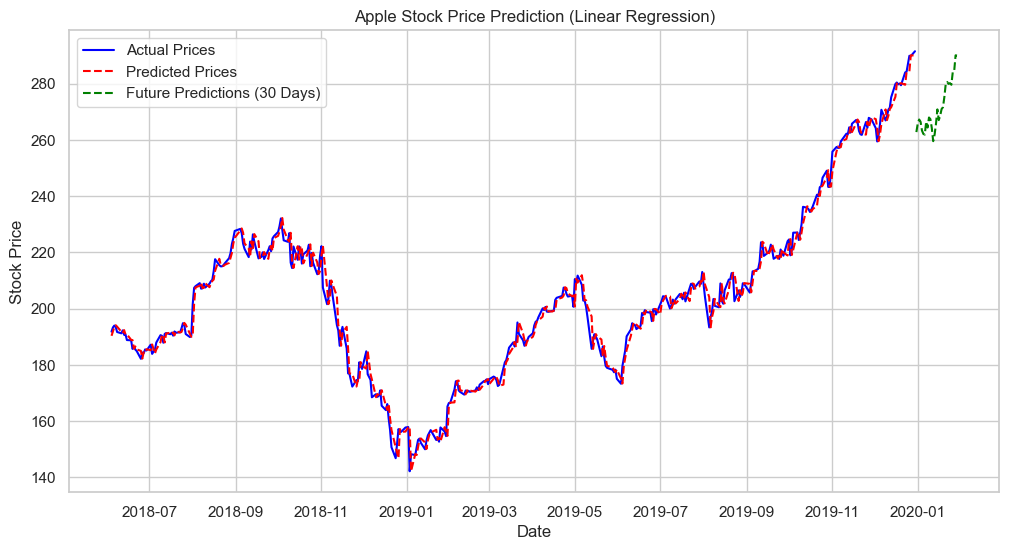

In [204]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

stock = pd.read_csv('AAPL.csv')

# Create Lag Features
df['Lag_1'] = df[target].shift(1)
df['Lag_7'] = df[target].shift(7)

# Drop rows with NaN values
df.dropna(inplace=True)

# 🚀 Debugging step
st.write("📉 Dataset after shifting and cleaning:", df.shape)

# Train-Test Split
train_start = df.index.min()
test_start = df.index[int(0.8 * len(df))]  # Use 80% for training

train = df.loc[train_start:test_start]
test = df.loc[test_start:]

# Ensure we have enough data
if train.shape[0] == 0:
    st.error("❌ Training set is empty! Adjust date range or Lag values.")

X_train = train[['Lag_1', 'Lag_7']].values
y_train = train[target].values
X_test = test[['Lag_1', 'Lag_7']].values
y_test = test[target].values

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Create future dates (next 30 days)
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=30, freq="D")

# Generate future features (assuming `X_test_scaled` has features needed)
future_features = X_test_scaled[-30:]  # Modify this based on your feature engineering

# Predict future stock prices
future_predictions = lr_model.predict(future_features)

# Convert future predictions to Pandas Series
future_predictions_series = pd.Series(future_predictions, index=future_dates)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Actual Prices", color="blue")
plt.plot(test.index, y_pred_lr, label="Predicted Prices", color="red", linestyle="dashed")
plt.plot(future_dates, future_predictions_series, label="Future Predictions (30 Days)", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Apple Stock Price Prediction (Linear Regression)")
plt.legend()
plt.show()


## RNN MODEL

#A Recurrent Neural Network (RNN) is a type of artificial neural network designed for sequential data.
#Unlike traditional feedforward networks, RNNs have loops that allow information to persist, making them useful
#for tasks involving time-series data, natural language processing, and speech recognition

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df is your DataFrame
features = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume',
            'Open_Daily_Return', 'High_Daily_Return', 'Low_Daily_Return', 'Close_Daily_Return', 'Adj_Close_Daily_Return',
            'Open_MA30', 'High_MA30', 'Low_MA30', 'Close_MA30', 'Adj_Close_MA30']

target = 'Close'  # Predicting the closing price

# Scale the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

def create_sequences(data, target_index, seq_length=30):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length, target_index])
    return np.array(sequences), np.array(labels)

# Creating sequences
seq_length = 30  # Using 30 past days to predict
X, y = create_sequences(df_scaled, features.index(target), seq_length)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build RNN model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Predicting a single value
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred_actual = scaler.inverse_transform(np.hstack((np.zeros((y_pred.shape[0], len(features) - 1)), y_pred.reshape(-1, 1))))[:, -1]

# Predict next 30 days
last_30_days = df_scaled[-seq_length:]
predictions = []
dates = pd.date_range(start=df.index[-1], periods=31, freq='B')[1:]
for _ in range(30):
    pred_input = np.expand_dims(last_30_days, axis=0)
    pred = model.predict(pred_input)[0][0]
    predictions.append(pred)
    last_30_days = np.vstack((last_30_days[1:], np.append(np.zeros(len(features) - 1), pred)))

# Inverse transform predictions
predictions_actual = scaler.inverse_transform(np.hstack((np.zeros((30, len(features) - 1)), np.array(predictions).reshape(-1, 1))))[:, -1]




In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_pred_actual, label='Predicted Close', linestyle='dashed')
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], len(features) - 1)), y_test.reshape(-1, 1))))[:, -1], label='Actual Close', alpha=0.7)
plt.plot(pred_df['Date'], pred_df['Predicted_Close'], label='30-Day Forecast', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pred_df = pd.DataFrame({'Date': dates, 'Predicted_Close': predictions_actual})
print(pred_df)


In [ ]:
# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

